<br>
<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color:#FA4659; color :  #F0FFF3; text-align: center; border-radius: 5px 5px; padding: 5px"> Customers And App Usage: Multiple TimeSeries with No DL</h2> 
<br>
<div class = 'image'> <img style="float:center; width:80%;border:10px solid #FA4659;" align=center src = https://cdn.searchenginejournal.com/wp-content/uploads/2020/07/3f358ca2-3ebe-4783-931c-f58b110b2254-5f1ce28e38466-1520x800.jpeg> 
</div>
<br>
<br>

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Here are my other notebooks....Do checkout if you find my work Helpful....Happy Reading :)</strong></p>
<ol>
<li><a href ="https://www.kaggle.com/bhuvanchennoju/netflix-is-awesome-why-see-here" >Netflix is awesome.why? see here</a></li>
<li> <a href ="https://www.kaggle.com/bhuvanchennoju/data-stroytelling-auc-focus-on-strokes" >Datastorytelling with auc focus on strokes</a></li>
<li> <a href = "https://www.kaggle.com/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21">Diamonds and Dollars: Experiments and fun r2(99.2)</a></li>
<li> <a href = "https://www.kaggle.com/bhuvanchennoju/ancient-roots-of-agriculture-a-data-overview">Ancient roots of Agriculture: a data overview</a></li>
<li> <a href = "https://www.kaggle.com/bhuvanchennoju/hey-siri-is-it-a-or-f1-0-992">Hey siri: cat or dog classificaiton</a></li>
<li> <a href = "https://www.kaggle.com/bhuvanchennoju/women-and-cancer-analysis-and-detection">women and cancer: analysis and detection</a></li>
    
</ol>

<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px; padding: 5px;text-align:center; font-weight: bold" >Table of Contents</h2> 

* [1. Introduction](#1.0)
    * [1.1 Libraries and Initial Data with Stats](#1.1)
 
* [2. Data Visualizations and Insights](#2.0)
    * [2.1 Data Visualizations of Primary Features](#2.1)
    * [2.2 Data Visualizations with AutoViz](#2.2)

* [3. Modeling and Predictions](#3.0)
    * [3.1 Approch 1: Failed 1 ](#3.1)
    * [3.2 Approch 2: Failed 2](#3.2)
    * [3.3 Approch 3: Going In A Right Direction ](#3.3)
    * [3.3.1 Approch 3:  Lag0 addition ](#3.3.1)
    * [3.3.2 Approch 3: Lag1 addition](#3.3.2)
    * [3.4 Feature Engineering - Rolling Windows, Lag Addition,and Datetimes ](#3.4)
    * [3.5 Baseline Model with Feature engineered data ](#3.5)
    * [3.6 Feature Selection with Permuation Feature Importance](#3.6)
    * [3.7 Final Baseline Model with Selected Features ](#3.7)
    * [3.8 Hyperparameter Optimization with Optuna](#3.8)
    * [3.9 Error Analysis](#3.9)


* [4. Summary](#4)

* [5. References](#5)



<a id = '1.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" >1. Introduction</h2>
<br>

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>What are we trying to solve with this dataset? - Problem Statement</strong></p>

We have a lot of customer on our InvestorAI platform. Whenever they login in our app and view anything, we get pings from their mobile phone indicating that they are using the app.
<br>
You have been provided with 3 weeks of training data and 1 week of test data.
<br>
<br>
<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>What this data about?</strong></p>

The dataset has three files. The data in the first two films can be used for training the model
and the third file contains test data.

* customers.csv: This file contains customers profile data
* pings.csv: This file contains: This file contains the customer pings
* test.csv: This file has the test data

The fields present in these files are described below.

**customers.csv:**

* id: Unique customer id
* gender: Gender of the customer
* age: Customer’s age
* numberofkids: The number of kids the customer has

**pings.csv:**

* id: The id of the customer whose ping has been received. It is guaranteed
  that the details of this customer will be available in the customers.csv file.
* timestamp: The Unix epoch timestamp when ping was received by the
  system.

**test.csv:**

* id: The id of the customer whose ping has been received. It is guaranteed
  that the details of this customer will be available in the cutomers.csv file.
* date: The date in YYYY-MM-DD format for which the online hours needs
  to be predicted.
* onlinehours: The number of online hours Given id and date, you should predict onlinehours.

<br>
<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Objective</strong></p>

We want to predict how many hours the customer will be online / using our app on a given day. So the test data contains customer id, and date (during the test data period).
The test data also contains the actual online hours, which is what our model should predict.

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Evaluation Metric:</strong></p>


We will be looking at Root Mean Squared Error or RMSE for short (lower the better) to see how good your model is.

<p style = "font-size:20px; color:#11CBD7 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Initial Insights:</strong></p>

1. Looks like we are handling a raw data as custumer database and the activity are seperated out in the data itself. So few assumpitions and data cleaning could be needed ?
2. Clearly given in the problem statement that we are going to handle a time related data for each customer.  This could be a multivariante time series problem with multiple timeseries. So modeling stategy and model building need to  be done to capture patterns, ( lets assume)
3. Error metric is root mean squred error so its sensitive to small changes, can I optimize my model for better metric, root mean squared log error which is more reponsive to very fine changes?

<p style = "font-size:35px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Lets Dive Into The Data....</strong></p>

<a id = '1.1'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > Libraries,Data and Palette</h2>

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>1. Libraries Importing</strong></p>

In [1]:
#importing modules

import warnings 
warnings.filterwarnings('ignore')

import time
t = time.time()

print('Importing startred...')

# base libraries
import os
import numpy as np
import pandas as pd
import re
from scipy import stats
from random import randint
from datetime import datetime


# visualization libraries
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import seaborn as sns
import missingno as msno


# preprocessing libraries


from sklearn.model_selection import (TimeSeriesSplit,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     train_test_split, 
                                     KFold, 
                                     StratifiedKFold,
                                    cross_val_score)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   OrdinalEncoder)

from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error)
from sklearn.metrics import make_scorer


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso, 
                                  ridge_regression,
                                  LinearRegression)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor, 
                              RandomForestRegressor,
                              VotingRegressor, 
                              GradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import (LGBMRegressor,
                      early_stopping)

from sklearn.base import clone ## sklearn base models for stacked ensemble model


#Interpretiability of the model
import shap
import eli5
from eli5.sklearn import PermutationImportance


## misea
from sklearn.pipeline import make_pipeline
#!pip install rich
#import rich     # terminal color fonts
#from rich import print as color_print
#from rich.console import Console
#from rich.theme import Theme

# terminal color palette
#custom_theme = Theme({
#    "info" : "italic bold cyan",
#    "warning": "bold blue",
#    "danger": "bold blue"
#})

#console = Console(theme=None,color_system = 'standard',)


print('Done, All the required modules are imported. Time elapsed: {}sec'.format(time.time()-t))

Importing startred...


Done, All the required modules are imported. Time elapsed: 10.40646743774414sec


<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>2. Color Palette</strong></p>

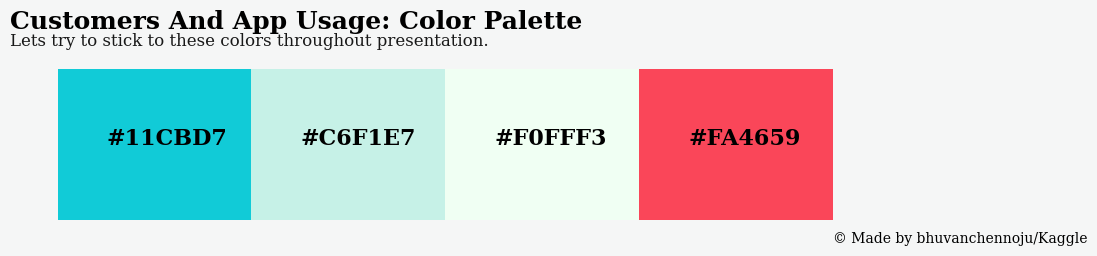

In [2]:
colors= ['#11CBD7' ,'#C6F1E7' ,'#F0FFF3' ,'#FA4659']

sns.palplot(colors,size = 3)

plt.gcf().set_size_inches(10,2)
plt.gcf().set_dpi(100)

plt.text(-0.75,-0.77, 'Customers And App Usage: Color Palette',{'fontfamily':'serif', 'size':18, 'weight':'bold'})
plt.text(-0.75,-0.66, 'Lets try to stick to these colors throughout presentation.',{'fontfamily':'serif', 'size':12},alpha = 0.9)
for idx,values in enumerate(colors):
    plt.text(idx-0.25,0, colors[idx],{'fontfamily':'serif', 'size':16, 'weight':'bold','color':'black'}, alpha =1)
plt.gcf().set_facecolor('#f5f6f6')
plt.box(None)
plt.axis('off')
plt.text(3.5,0.65,'© Made by bhuvanchennoju/Kaggle',{'fontfamily':'serif', 'size':10,  'color':'black'})
plt.show()

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>3. Data Loading and Initila insights</strong></p>

In [3]:
# loading data
customer_df = pd.read_csv('../input/mobile-usage-time-prediction/customers.csv', delimiter = ',', encoding = 'utf-8')
pings_df = pd.read_csv('../input/mobile-usage-time-prediction/pings.csv', delimiter = ',', encoding = 'utf-8')
test_df = pd.read_csv('../input/mobile-usage-time-prediction/test.csv', delimiter = ',', encoding = 'utf-8')

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Sneak peak into the data....</strong></p>

In [4]:
print('*'*10 + ' Data Summary and Inital peaks ' + '*'*10 )

print('\n'+'*'*15 + 'Shapes of Data ' + '*'*15+'\n' )

print('Shape of the Customer database: {}'.format(customer_df.shape))
print('Shape of the Pings dataset: {}'.format(pings_df.shape))
print('Shape of the Test dataset: {}'.format(test_df.shape))

print('\n'+'*'*50 + '\n')

print(' Head of Customer database '+ '\n')
print(customer_df.head())

print('\n' +'*'*50+ '\n')

print('Head of Ping dataset'+ '\n')
print(pings_df.head())

print('\n' +'*'*50 + '\n')

print('Head of Test dataset'+ '\n')
print(test_df.head())

print('\n' +'*'*50 + '\n')


********** Data Summary and Inital peaks **********

***************Shapes of Data ***************

Shape of the Customer database: (2500, 4)
Shape of the Pings dataset: (50528701, 2)
Shape of the Test dataset: (17500, 3)

**************************************************

 Head of Customer database 

       id gender  age  number_of_kids
0  979863   MALE   26               2
1  780123   MALE   60               2
2  614848   MALE   45               4
3  775046   MALE   62               3
4  991601   MALE   23               0

**************************************************

Head of Ping dataset

       id   timestamp
0  899313  1496278800
1  373017  1496278800
2  798984  1496278800
3  245966  1496278800
4  689783  1496278800

**************************************************

Head of Test dataset

       id      date  online_hours
0  979863  28/06/17             7
1  979863  27/06/17             9
2  979863  26/06/17             9
3  979863  25/06/17            10
4  979863  24/06

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Initial Insights about Data</strong></p>
1. As given in problem statement we have three csv files, customer, pings, test datasets. All in common is uniques id, Its customer id.
2. Customer database gives all the unique things about customer. This include children, gender, age, of the customer.
3. Coming to Ping dataset, data of timestamp is little difficult to compehend as its in unix epoch encodoing, as it is number of seconds from 1970s to specific time, need conversion to make something out of it.
4. Test data giving some hints, how I need to convert my training dataset? May be to datatime object.


Now questions are how to convert ping data timestamp form epoch timestamp to pandas timestamp? and how to calculate the online hours like test dataset? and finaly need to merge customer dataset to ping dataset and test dataset..


first thing first... lets convert ping data timestep to datatime timestamp and extract date, and other basic things later. 

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Number of Online Hours Calculation Assumption: </strong></p>


Here is the thing, I can calculate online hours directly by taking the one step slide diffrence of timestamps for each date for each customer (by grouping them together). But logically this could be a flawed approch. Reason behind this is no idea when session of custemer end as there is no capping limit given in problem statement. 

So, assuming if the slide time difference is less than 2minutes (i.e, 120Sec)
user active online time is same, if its more than that lets cap it to 2mins.


lets implement this idea to the ping dataset... 

In [5]:
### value sorting with respect to id and timestamp
pings_df = pings_df.sort_values(by = ['id','timestamp']).reset_index(drop=True)

# creating a copy to preserve actual ping data
temp_ping_df = pings_df.copy()

#pre-processing data
temp_ping_df.drop_duplicates(inplace = True)
temp_ping_df['timestamp_decode'] = temp_ping_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))


## timestamp and datagrouping
temp_ping_df['date'] = temp_ping_df['timestamp_decode'].dt.date
temp_ping_df['online_hours'] = (temp_ping_df.groupby(by=['id','date'])['timestamp'].diff())/(60*60)
temp_ping_df['online_hours']  =  temp_ping_df['online_hours'].apply(lambda x: x if x< (2/60) else (2/60))

temp_ping_df.fillna(0,inplace = True)

#### creating our training data
train_df= (temp_ping_df.groupby(by = ['id','date'])['online_hours'].sum()).reset_index()
train_df['online_hours'] = round(train_df['online_hours'],1)


## print statements
print('\n' +'*'*50+ '\n')

print('Head of the processed train data'+ '\n')
print(train_df.head())

print('\n' +'*'*50 + '\n')


**************************************************

Head of the processed train data

       id        date  online_hours
0  111556  2017-06-01           2.3
1  111556  2017-06-02           2.5
2  111556  2017-06-05           4.7
3  111556  2017-06-06           3.2
4  111556  2017-06-07           2.7

**************************************************



Now its looks good!! I got my train data like test data given! and now I can concatinate both train and test data together for feature extractions with less effort...

Idea is to sort test data with customer id and date, and store the value of online hours seperately while dropping online hours from train dataset, There by concatinate both test and train datasets.

Okay everything ready, now lets see the min, max dates for train and test datasets
Then move with concatination of both dataframes...

In [6]:
print('\n' +'*'*50 + '\n')
print('Minimum date and Maximum date for train dataset: {},{}'.format(train_df.date.min(), train_df.date.max()))
print('Minimum date and Maximum date for test dataset: {},{}'.format(test_df.date.min(), test_df.date.max()))
print('\n' +'*'*50 + '\n')


**************************************************

Minimum date and Maximum date for train dataset: 2017-06-01,2017-06-22
Minimum date and Maximum date for test dataset: 22/06/17,28/06/17

**************************************************



<a id = '2.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" > 2. Data Visualization and Insights</h2>
<br>

<a id = '2.1'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 2.1 Data visualization of Primary Features</h2>

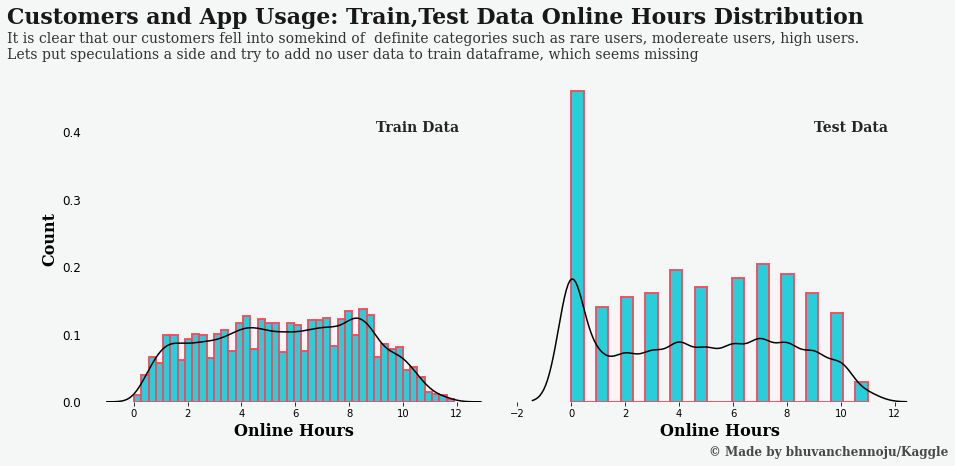

In [7]:
fig = plt.figure(figsize = (15,6))
fig.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(10,10)

ax0 = fig.add_subplot(gs[:,0:5])
ax1 = fig.add_subplot(gs[:,5:], sharey = ax0)


axes = [ax0,ax1]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['left','right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax0.tick_params(axis='y', which='major', 
                    labelsize=12, labelright =False,left =False,right=False,labelleft=True,rotation = 0)



### plots 
sns.distplot(x = train_df['online_hours'],
             hist_kws = {'color':colors[0], 'linewidth': 2,'edgecolor':colors[-1], 'alpha':0.9 },
             kde = True,kde_kws = {'color':'black', "linewidth": 1.5}, ax=ax0)
sns.distplot(x = test_df['online_hours'],
             hist_kws = {'color':colors[0], 'linewidth': 2,'edgecolor':colors[-1], 'alpha':0.9},
             kde = True,kde_kws = {'color':'black', "linewidth": 1.5}, ax=ax1)
ax1.axes.get_yaxis().set_visible(False)
ax0.set_ylabel('Count',**{'font':'serif','size':16,'weight':'bold'})
ax0.set_xlabel('Online Hours',**{'font':'serif','size':16,'weight':'bold'})
ax1.set_xlabel('Online Hours',**{'font':'serif','size':16,'weight':'bold'})




#### final writigs and titles


fig.text(0.05,1,'Customers and App Usage: Train,Test Data Online Hours Distribution ' ,**{'font':'serif', 'size':22,'weight':'bold',}, alpha = 0.9)

fig.text(0.05,0.92,'''It is clear that our customers fell into somekind of  definite categories such as rare users, modereate users, high users. 
Lets put speculations a side and try to add no user data to train dataframe, which seems missing''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.70,0,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':12, 'weight':'bold',},alpha = 0.7)


### subplot titles
ax0.text(9,.4, 'Train Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)
ax1.text(9,.4, 'Test Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)

fig.show()

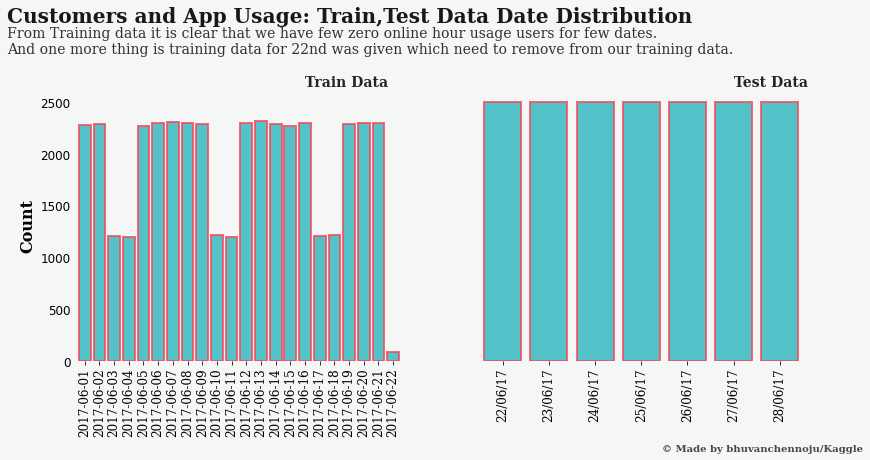

In [8]:
fig = plt.figure(figsize = (13,5))
fig.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(20,20)

ax0 = fig.add_subplot(gs[:,0:9])
ax1 = fig.add_subplot(gs[:,11:], sharey = ax0)

axes = [ax0,ax1]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['left','right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax0.tick_params(axis='y', which='major', 
                    labelsize=12, labelright =False,left =False,right=False,labelleft=True,rotation = 0)
   
    
### plots 

train_date_order = train_df.date.sort_values().unique().tolist()
test_date_order = test_df.date.sort_values().unique().tolist()

sns.countplot(x = train_df['date'], ax=ax0,order = train_date_order,
              color = colors[0], edgecolor = colors[-1], linewidth =2,alpha = 0.8)
sns.countplot(x = test_df['date'],ax=ax1,order = test_date_order,
             color = colors[0], edgecolor  = colors[-1], linewidth =2,alpha = 0.8)

ax1.axes.get_yaxis().set_visible(False)
ax0.set_ylabel('Count',**{'font':'serif','size':16,'weight':'bold'})
ax0.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})
ax1.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})

ax0.set_xticklabels(ax0.axes.get_xticklabels(), rotation = 90,**{'font':'serif','size':12})
ax1.set_xticklabels(ax1.axes.get_xticklabels(), rotation = 90,**{'font':'serif','size':12})

#### final writigs and titles


fig.text(0.05,1.065,'Customers and App Usage: Train,Test Data Date Distribution ' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(0.05,0.98,'''From Training data it is clear that we have few zero online hour usage users for few dates.
And one more thing is training data for 22nd was given which need to remove from our training data.''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,-0.125,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)


### subplot titles
ax0.text(15,2650,'Train Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)
ax1.text(5,2650,'Test Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)


fig.show()

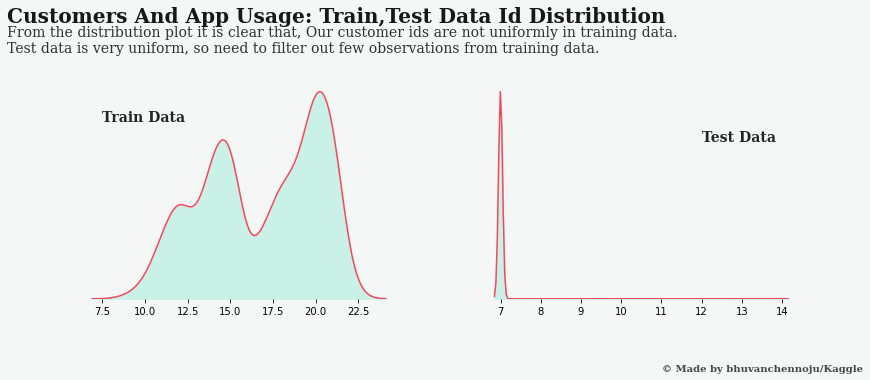

In [9]:
fig = plt.figure(figsize = (13,4))
fig.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(20,20)

ax0 = fig.add_subplot(gs[:,0:9])
ax1 = fig.add_subplot(gs[:,11:], sharey = None)

axes = [ax0,ax1]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['left','right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax0.tick_params(axis='y', which='major', 
                    labelsize=12, labelright =False,left =False,right=False,labelleft=True,rotation = 0)
   
    
### plots 

train_date_order = train_df.id.sort_values().unique().tolist()
test_date_order = test_df.id.sort_values().unique().tolist()

sns.kdeplot(x = train_df.id.value_counts().values,ax = ax0,color = colors[1], fill = True,alpha = 0.9)
sns.kdeplot(x = train_df.id.value_counts().values,ax = ax0,color = colors[-1], shade = False)
sns.kdeplot(x = test_df.id.value_counts().values,ax = ax1,color = colors[1], fill = True,alpha = 0.9)
sns.kdeplot(x = test_df.id.value_counts().values,ax = ax1,color = colors[-1], shade = False)

ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax0.set_ylabel('Count',**{'font':'serif','size':16,'weight':'bold'})
ax0.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})
ax1.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})


#### final writigs and titles


fig.text(0.05,1.085,'Customers And App Usage: Train,Test Data Id Distribution ' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(0.05,0.98,'''From the distribution plot it is clear that, Our customer ids are not uniformly in training data.
Test data is very uniform, so need to filter out few observations from training data.''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,-0.125,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)


### subplot titles
ax0.text(7.5,0.125,'Train Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)
ax1.text(12,5.95,'Test Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)


fig.show()


<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Insights for Primary Data Plots:</strong></p>


1. Clearly some values of onlinehours zero need to be added to the training data. From the plot is is clear that data is not balanced for few dates, lets add zeros for online hours in those particular dates.
2. Date in training set have 22nd date values, which we need to predict, so lets fileter our data for excluding that dates data.
3. Distribution data of Id, implies the same that, training data has to balance with zeros, when online hours is not present for a particular date.



<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Lets clean training data as per our observations...</strong></p>


In [10]:
## lets correct the training dataset...
train_df['date'] = train_df['date'].astype(str)
train_df =  train_df[train_df['date'] < '2017-06-22'] ## datecorrection

train_date_df = pd.DataFrame({'date':pd.date_range(start='2017-06-01', end='2017-06-21')}) ## data time series for correcting training data date
train_date_df['date'] = (train_date_df['date'].dt.date).astype(str)


## creating a grouped id, data dict 
ids_group = train_df.groupby(by ='id')['date'].unique()

##### creating a zero usage user dataframe to concatinate with training dataset

id_list = []
date_list = []
online_hours = []
for index, ids, dates in zip( range(len(ids_group)), ids_group.keys(), ids_group.values):
    
    date_ = dates.tolist()
    
    for date in train_date_df['date'].tolist():
        if date_ == train_date_df['date'].tolist():
            break
        else:
            if date not in date_:
                #tempdf[['id','date','online_hours'] ]= ids,date,0
                id_list.append(ids)
                date_list.append(date)
                online_hours.append(0)
                date_.append(date)

zero_df = pd.DataFrame({'id':id_list,'date':date_list, 'online_hours':online_hours})

train_df_backup = train_df.copy() # lets store away train_df for any futrue purpose

train_df = pd.concat([train_df,zero_df],sort = False)

train_df = train_df.sort_values(by = ['id','date'])

In [11]:
# sanity check

print('\n'+'*'*50 + '\n')


print('\n'+'*'*10 + 'Sanity Check for Training Data' + '*'*10 +'\n')

print('Any duplicate values in the training data'+ '\n')
print(train_df.duplicated().any())

print('\n' +'*'*50+ '\n')

print('Any Null values in the training data'+ '\n')
print(train_df.isnull().any())

print('\n' +'*'*50 + '\n')




**************************************************


**********Sanity Check for Training Data**********

Any duplicate values in the training data

False

**************************************************

Any Null values in the training data

id              False
date            False
online_hours    False
dtype: bool

**************************************************



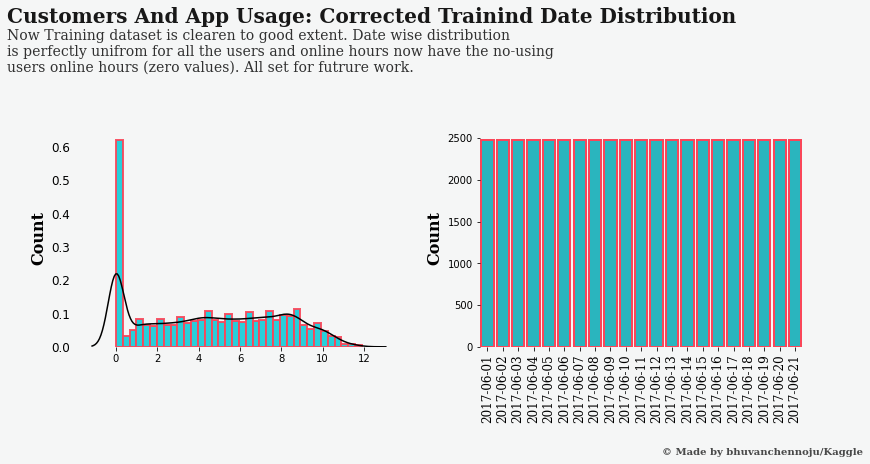

In [12]:
fig = plt.figure(figsize = (13,4))
fig.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(20,20)

ax0 = fig.add_subplot(gs[:,0:9])
ax1 = fig.add_subplot(gs[:,11:])


axes = [ax0,ax1]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['left','right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax0.tick_params(axis='y', which='major', 
                    labelsize=12, labelright =False,left =False,right=False,labelleft=True,rotation = 0)
   
    
### plots 

train_date_order = train_df.date.sort_values().unique().tolist()
test_date_order = test_df.date.sort_values().unique().tolist()

sns.distplot(x = train_df['online_hours'],
             hist_kws = {'color':colors[0], 'linewidth': 2,'edgecolor':colors[-1], 'alpha':0.9 },
             kde = True,kde_kws = {'color':'black', "linewidth": 1.5}, ax=ax0)

sns.countplot(x = train_df['date'],ax=ax1,
             color = colors[0], edgecolor  = colors[-1], linewidth =2)


ax0.set_ylabel('Count',**{'font':'serif','size':16,'weight':'bold'})
ax0.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})
ax1.set_xlabel('',**{'font':'serif','size':16,'weight':'bold'})
ax1.set_ylabel('Count',**{'font':'serif','size':16,'weight':'bold'})


#ax0.set_xticklabels(ax0.axes.get_xticklabels(), rotation = 90,**{'font':'serif','size':12})
ax1.set_xticklabels(ax1.axes.get_xticklabels(), rotation = 90,**{'font':'serif','size':12})
#ax2.set_xticklabels(ax2.axes.get_xticklabels(), rotation = 90,**{'font':'serif','size':12})
#### final writigs and titles


fig.text(0.05,1.25,'Customers And App Usage: Corrected Trainind Date Distribution' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(0.05,1.08,'''Now Training dataset is clearen to good extent. Date wise distribution 
is perfectly unifrom for all the users and online hours now have the no-using  
users online hours (zero values). All set for futrure work.''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,-0.250,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)


### subplot titles
#ax0.text(15,2650,'Train Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)
#ax1.text(5,2650,'Test Data',{'font':'serif', 'size':14, 'weight':'bold',},alpha = 0.85)


fig.show()



<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Lets concatinate the training and dataset now , by removing the values of online training from the test data and lets keep them in a list...</strong></p>


In [13]:

# preparing test dataset for concatination with train data
test_df = test_df.sort_values(by = ['id','date'])
test_df['date'] =  pd.to_datetime(test_df['date']).dt.date
test_hours = test_df['online_hours']
test_dropped_df  = test_df.drop(columns = ['online_hours'])

In [14]:

print('\n' + '\n')
print('\n' +'*'*10+ ' Head of Test DataFrame with dropped online_hours' +'*'*10+'\n')

print(test_dropped_df.head())

    
df = pd.concat([train_df, test_dropped_df], sort=False)

print('\n' + 'Shape of The Concatinated DateFrame: {}'.format(df.shape) +'\n')

print('\n' +'*'*10+ ' Head of The Concatinated DataFrame ' +'*'*10+'\n')
print(df.head())

print('\n' +'*'*10+ ' Tail of The Concatinated DataFrame ' +'*'*10+'\n')
print(df.tail())

print('\n' +'*'*5+ ' After filling NaN values with Zeros in Concatinated DataFrame ' +'*'*5+'\n')
#df.fillna(0,inplace = True)
print(df.tail())
print('\n' +'*'*50+ '\n')





********** Head of Test DataFrame with dropped online_hours**********

         id        date
181  111556  2017-06-22
180  111556  2017-06-23
179  111556  2017-06-24
178  111556  2017-06-25
177  111556  2017-06-26

Shape of The Concatinated DateFrame: (69580, 3)


********** Head of The Concatinated DataFrame **********

       id        date  online_hours
0  111556  2017-06-01           2.3
1  111556  2017-06-02           2.5
0  111556  2017-06-03           0.0
1  111556  2017-06-04           0.0
2  111556  2017-06-05           4.7

********** Tail of The Concatinated DataFrame **********

           id        date  online_hours
12387  998740  2017-06-24           NaN
12386  998740  2017-06-25           NaN
12385  998740  2017-06-26           NaN
12384  998740  2017-06-27           NaN
12383  998740  2017-06-28           NaN

***** After filling NaN values with Zeros in Concatinated DataFrame *****

           id        date  online_hours
12387  998740  2017-06-24           NaN
1

<a id = '2.2'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" >2.2 Data visualization of Features with AutoViz - Simple, Yet Powerful Library</h2>

In [15]:
# installing autoviz for simple insights
!pip install autoviz #insatlling autoviz
!pip install xlrd
from autoviz.AutoViz_Class import AutoViz_Class

     |████████████████████████████████| 44 kB 234 kB/s 
     |████████████████████████████████| 96 kB 718 kB/s 
Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 1. Customer Data Visualization with AutoViz</h2>

Shape of your Data Set loaded: (2500, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


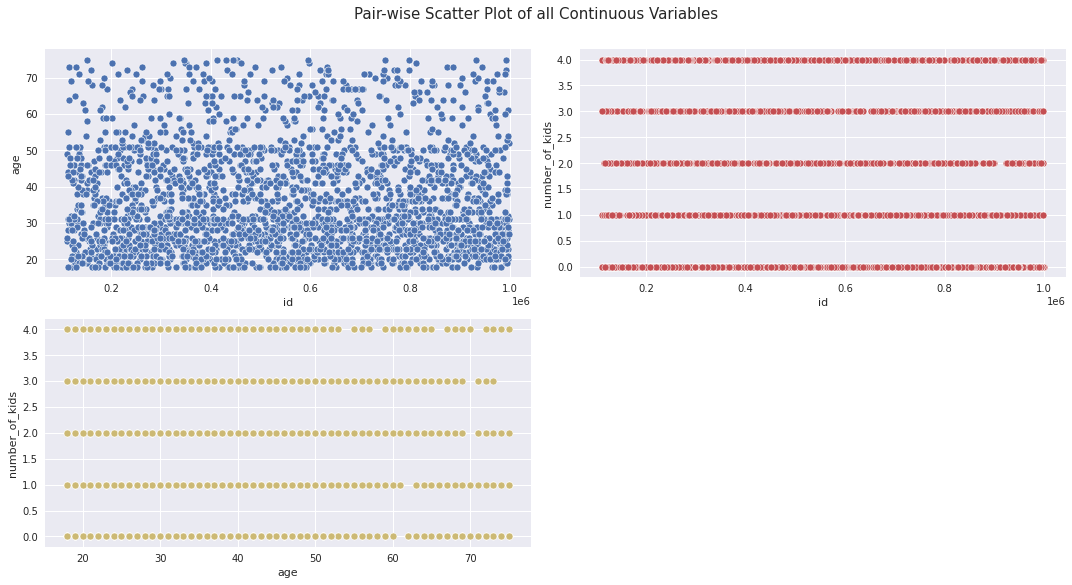

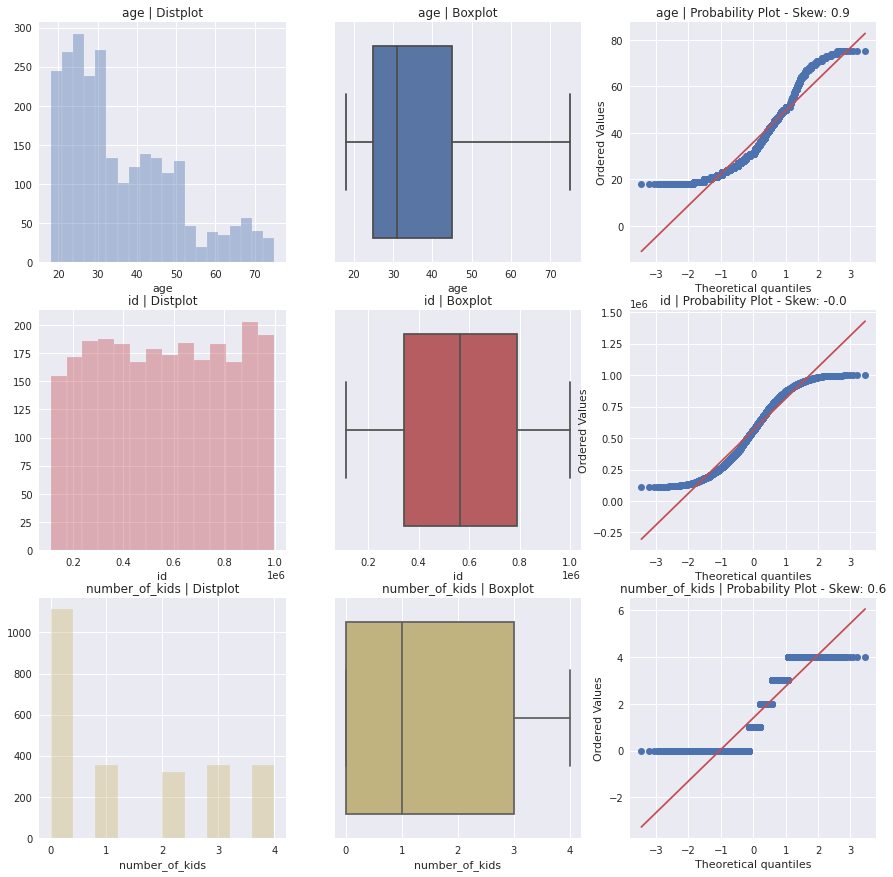

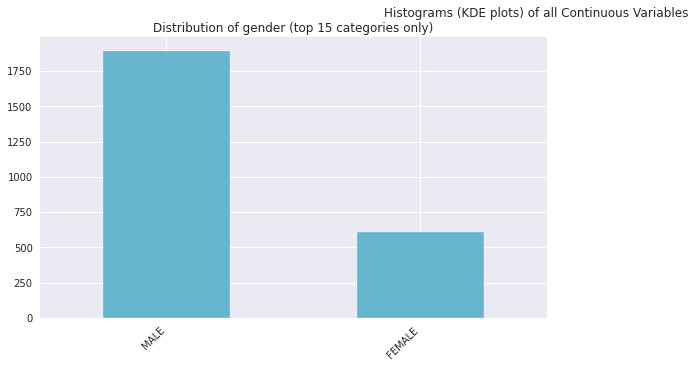

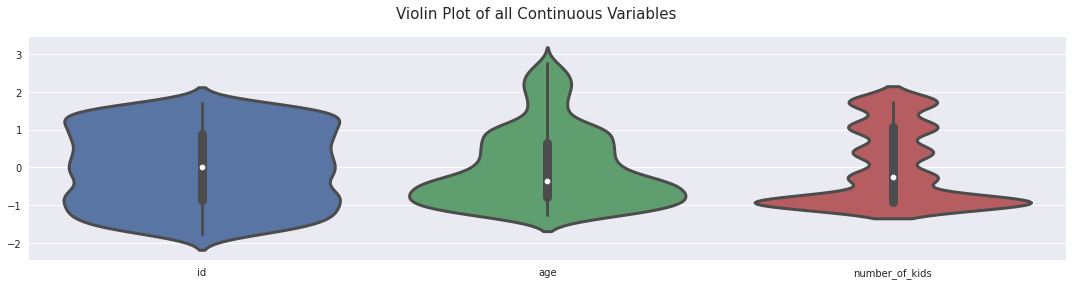

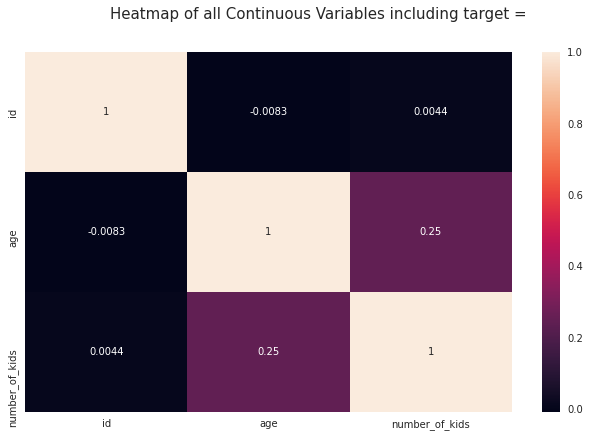

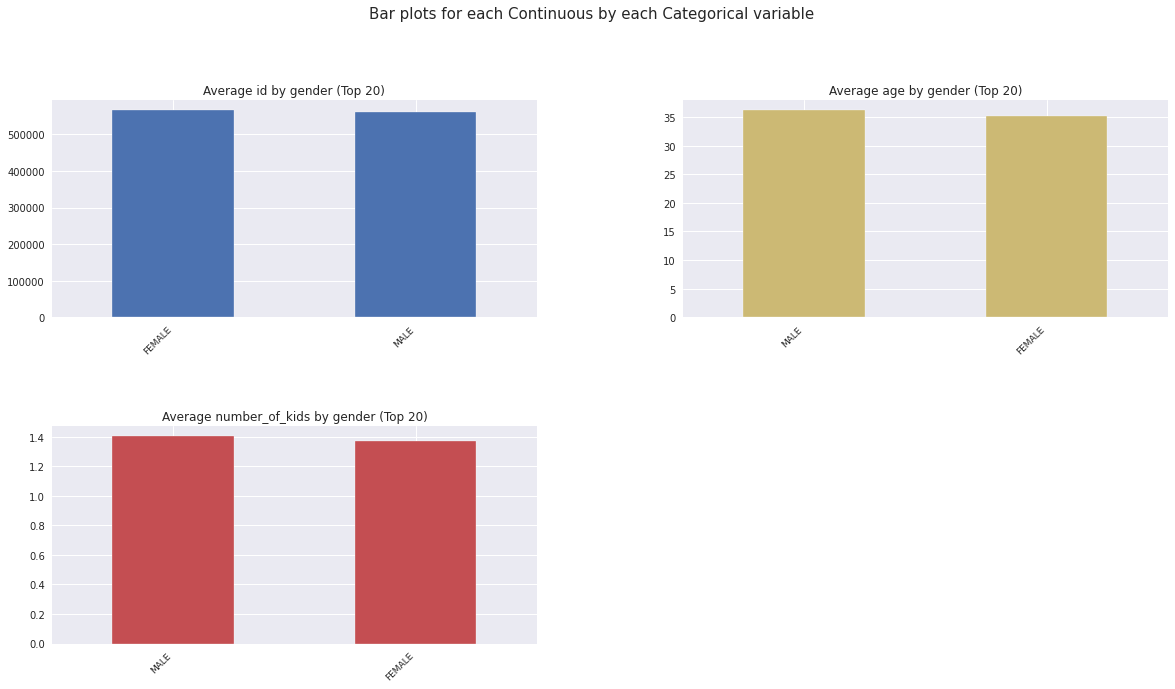

Time to run AutoViz (in seconds) = 4.051

 ###################### VISUALIZATION Completed ########################


In [16]:
autoviz = AutoViz_Class().AutoViz('../input/mobile-usage-time-prediction/customers.csv')

Nice!!! I got to know about all the basic information about my customers.

<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 2. Training Data Visualization with AutoViz</h2>

Shape of your Data Set loaded: (52080, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set


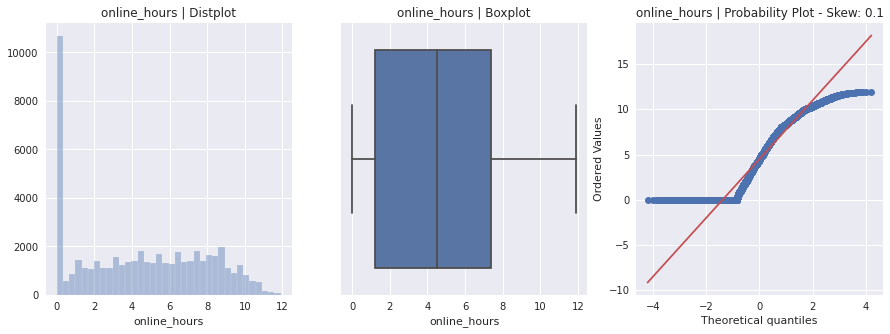

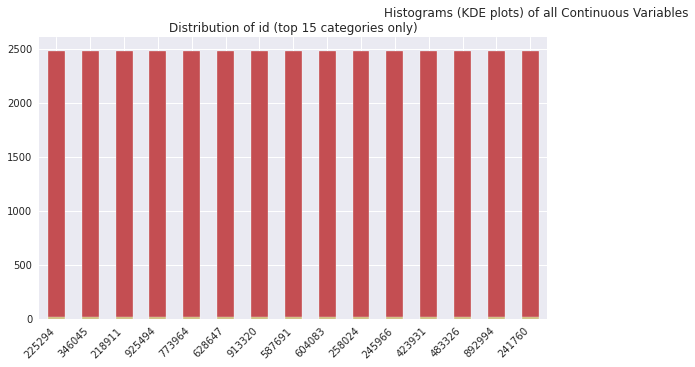

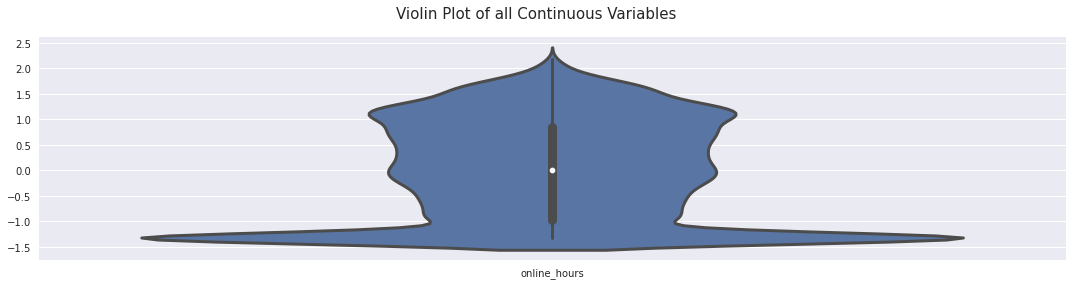

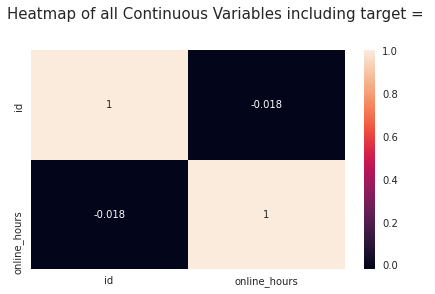

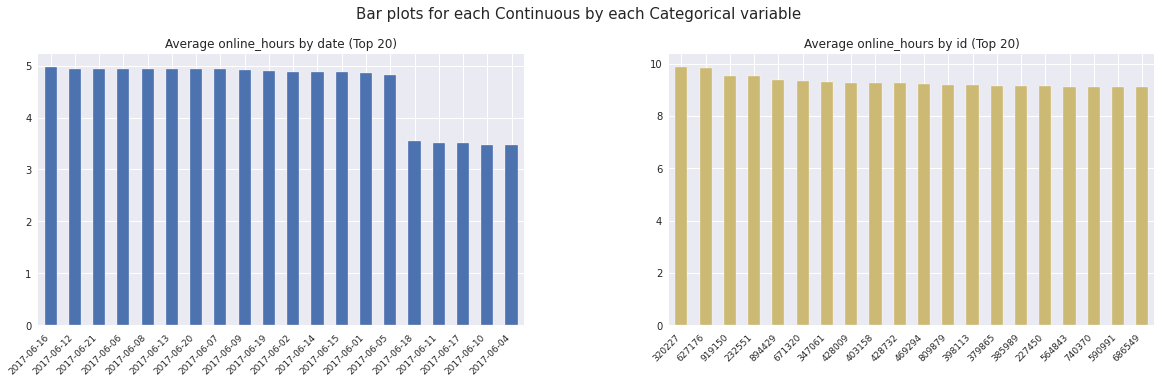

Time to run AutoViz (in seconds) = 2.679

 ###################### VISUALIZATION Completed ########################


In [17]:
train_autoviz = AutoViz_Class()

filename = ""
sep = ","
dft = train_autoviz.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte= train_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 3. Testing Data Visualization with AutoViz</h2>

Shape of your Data Set loaded: (17500, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    3 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


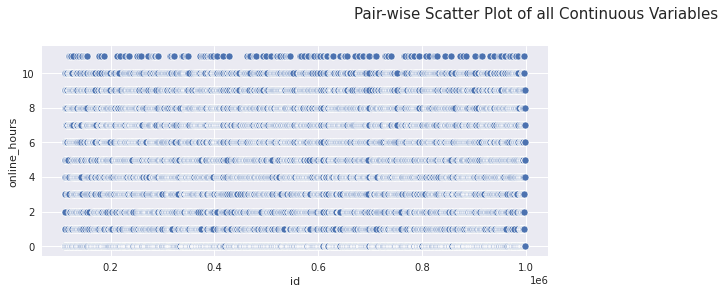

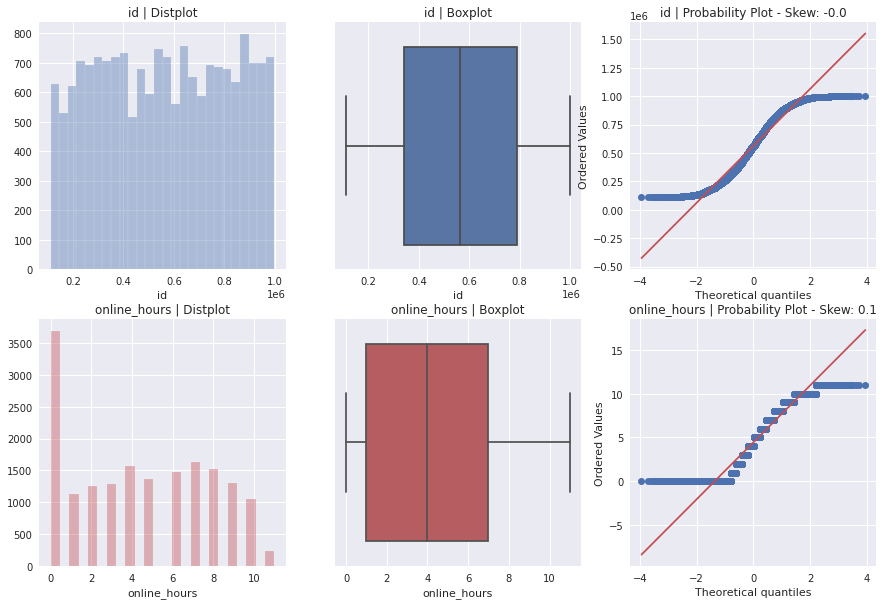

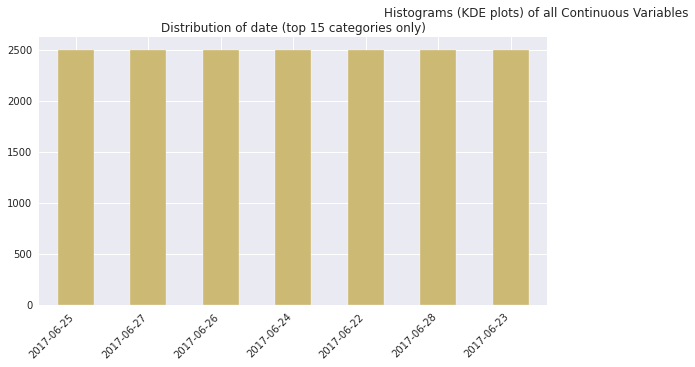

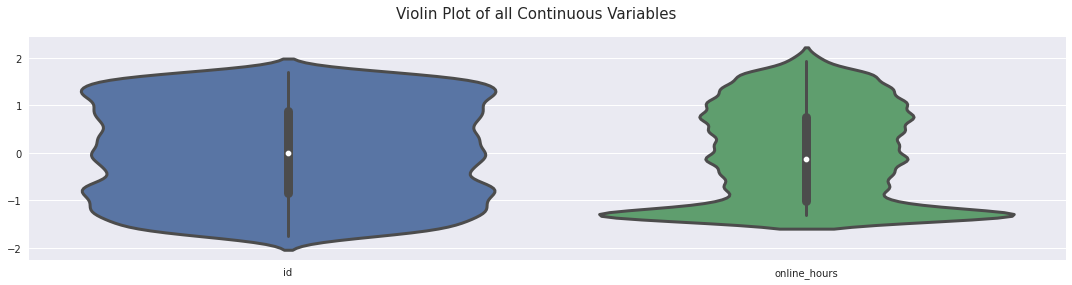

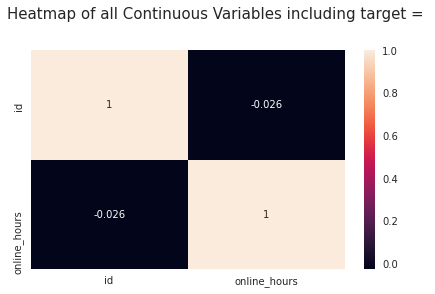

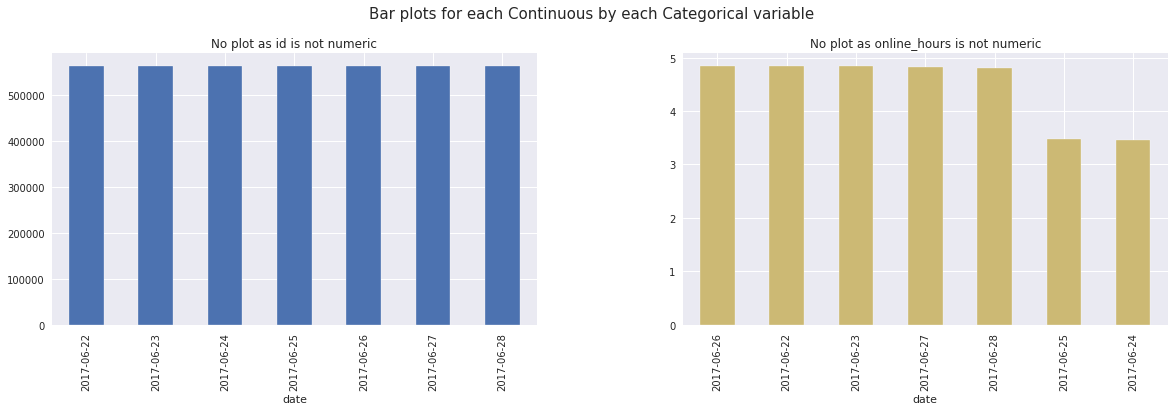

Time to run AutoViz (in seconds) = 3.422

 ###################### VISUALIZATION Completed ########################


In [18]:
train_autoviz = AutoViz_Class()

filename = ""
sep = ","
dft = train_autoviz.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte= test_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

<a id = '3.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" > 3. Modeling and Predictions</h2>
<br>

I have done datacleaning and visualiztion till now, moving on to the modeling...

<br>
<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Modeling Strategy:</strong></p>
This is a quite tricky problem to solve, data seems to be very huge when handling the raw training data. Even ran into Memory Error, as data points are 5 core in size, and Thanks to kaggle 16GB ram server, I was able to do the preprocessing of data. Now data size reduced drastically with calculation of online hours for training data. 

<br>
<br>
As there are <strong>multiple timeseries</strong> for each cusomter,initially I was struck with questions.

<ol><li> What model Should I use? given data is timeseries data but 2500 timeseries</li>
    <li> Should I train models with simple ARIMA or LSTM models for each of the timeseries and concat results or should I use a complex model to catpure all the details.</li>
    <li> Training data is very very less to train a deep learning models or satistical models as only 21 days data is available for training.</li>
</ol>

<br>
I have done experiments with data prior to forming my strategy for model building.... few of my attempt are failed to reach good result and insights are as follows:
<ol>
    <li>I have attempted to solve this with arima modeling initially, and due to limited data for individual timeseries data, it was unable to capture any kind of patterns.</li>
    <li>later moved to simple LSTM model and same issue was faced with that as they are data hungrey models</li>
    <li>My timeseries approch is not good for this problem as very limited data for timeseries. Later realized, one way to solve this model is problem is by formulating a single regression model, by taking the advantage of the similarities in the customers.</li>
    <li> While attempting, this basic regression approch few blenders were commited, such as using startifiedkfold, and train_test_split method for spliting data. Resluts are very very bad, as I messed up with time data. Later realized my mistakes I corrected them... </li>
    <li>For this basic model a baseline score was set by assuming the predictions for t(n) date are t(n-1) ( i.e,today predictions are yesterday values). And with this model sensitivity for rmse was measured and it gave good results so, went on..</li>
    <li> With lag implementation this simple regression models are made to mimimic the Time series models, and this gave very effective results...</li>
    
   <li> Upon understanding this drop in error, done feature engineering and worked for final solution...</li>

</ol>

 

<a id = '3.1'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 1. Approch 1: Learning From Mistakes - Failed Attempt 1</h2>

In [19]:
### basic feature engineering and modeling withignored time dependency

temp_df = pd.merge(left = customer_df, right = train_df, on = 'id', how = 'outer')

temp_df.dropna(inplace = True)
temp_df['gender'] = temp_df['gender'].replace({'MALE':1, 'FEMALE':0})

temp_df['date'] = pd.to_datetime(temp_df['date'])

## data and time related basic features
temp_df['day_name'] = temp_df['date'].dt.day_name()
temp_df['day'] = temp_df['date'].dt.day
temp_df['month'] = temp_df['date'].dt.month
temp_df['month_name'] = temp_df['date'].dt.month_name()
temp_df['year'] = temp_df['date'].dt.year



week_names = {'Sunday':0,'Monday':'1','Tuesday':2,'Wednesday':3, 'Thursday':4,'Friday':5,'Saturday':6}
month_names = {'January':0, 'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,
                'August':7, 'September':8,'October':9,'November':10,'December':11}

temp_df['day_name'] = temp_df['day_name'].map(week_names)
temp_df['month_name'] = temp_df['month_name'].map(month_names)


### solving model like a typical regression problem without any considerations and feature engineering
X = temp_df.drop(columns = ['date','id','online_hours'])
y = temp_df['online_hours']


# train, testing data spliting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2021) #shuffle and randomized selection

# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


## appending all the regressors

regressors = []

regressors.append(LinearRegression())
regressors.append(Lasso(alpha = 0.0005,max_iter = 1000))
regressors.append(RandomForestRegressor(n_estimators = 1000,max_depth=15))
regressors.append(AdaBoostRegressor())
regressors.append(GradientBoostingRegressor())
regressors.append(XGBRegressor(n_estimators = 1000,importance_type = 'gain'))
regressors.append(LGBMRegressor(n_estimators = 1000, objective ='regression',
                                importance_type = 'gain'))


#### fitting and modeling 

import time

print('Working on base models and fitting begains.....')

kfolds = KFold(n_splits = 5, shuffle = False)

baseline_models= clone(regressors)
algo = ['LinearRegression','Lasso', 'RandomForestRegressor' ,'AdaBoostRegressor',
                                          'GradientBoostingRegressor', 'XGBRegressor','LGBMRegressor']

cv_results = list()
for idx, reg in enumerate(baseline_models):
    t = time.time()
    print('Fitting of {} Model'.format(algo[idx]))
    print('Parameters of the model are: {}'. format(reg.get_params()))
    
    cv_results.append(cross_val_score(estimator=reg,X =X_train,y= y_train, cv = kfolds, n_jobs = -1, scoring= 'r2'))

    print('time elapsed is : {} sec'.format(round((time.time() - t),2)))
    print('\n\n\n*****************************\n\n\n')
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
baseline_cv_res = pd.DataFrame({'CrossValMeans':cv_means,"CrossValerrors":
                      cv_std,"Algorithm":['LinearRegression','Lasso', 'RandomForestRegressor' ,'AdaBoostRegressor',
                                          'GradientBoostingRegressor', 'XGBRegressor','LGBMRegressor']})

Working on base models and fitting begains.....
Fitting of LinearRegression Model
Parameters of the model are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
time elapsed is : 2.47 sec



*****************************



Fitting of Lasso Model
Parameters of the model are: {'alpha': 0.0005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
time elapsed is : 0.17 sec



*****************************



Fitting of RandomForestRegressor Model
Parameters of the model are: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score':

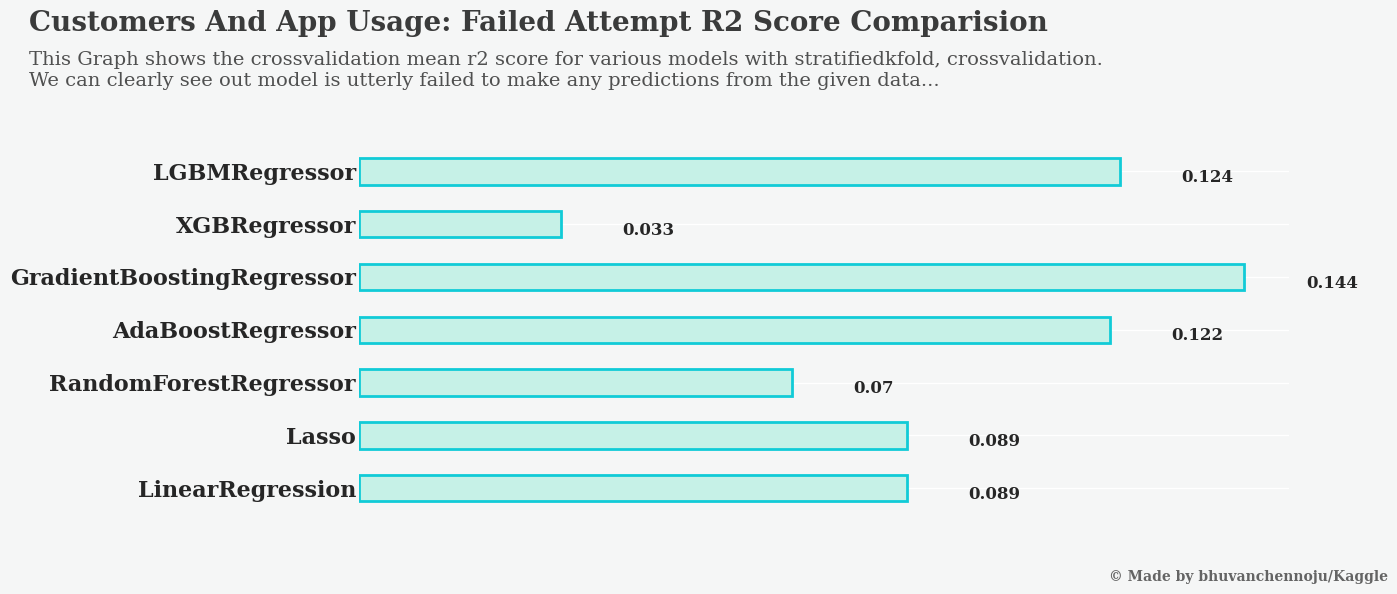

In [20]:
fig,ax = plt.subplots(figsize = (12,5), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')
ax.axes.set_facecolor('#f5f6f6')

ax.tick_params(axis='both', 
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 0.001)

ax.barh(y = baseline_cv_res['Algorithm'], width = baseline_cv_res['CrossValMeans'] , height = 0.5, color = colors[1], edgecolor = colors[0], linewidth =2)
ax.set_yticklabels(baseline_cv_res['Algorithm'], {'font':'serif','size':16,'weight':'bold'}, )

#ax.errorbar(x = , b, xerr=c, fmt="o", color="r")

for pa in ax.patches: 
        ax.text((pa.get_width())+0.01, pa.get_y()+0.05,'{}'.format(round(pa.get_width(),3)), **{'font':'serif', 'size':12, 'weight':'bold'}, alpha = 1)
        
ax.axes.get_xaxis().set_visible(False)

for loc in ['left', 'right', 'top','bottom']:
    ax.spines[loc].set_visible(False)
    

fig.text(-0.15,1.1,'Customers And App Usage: Failed Attempt R2 Score Comparision' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(-0.15,0.99,'''This Graph shows the crossvalidation mean r2 score for various models with stratifiedkfold, crossvalidation.
We can clearly see out model is utterly failed to make any predictions from the given data...''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,0,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)
fig.show()

<a id = '3.2'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 2. Approch 2: Failed Attempt2</h2>

This approch is Same as Approch 1 with few changes with No Time Related info Cross feeding.
In the above method few blunders are commited with ignoring the time dependencey... I have realized that and Implemented same thing again with same strategy by spliting train and test data with date selection and no change in values... 

1. Removed Stratifiedkfold impelmentation
2. splitted train and test data with date
3. Removed Crossvalidation impelmentaion

lets see how things will go...


In [21]:
# train and test data spliting
train = temp_df[temp_df['day'] <= 18]
val = temp_df[temp_df['day'] > 18]
    
X_train,X_test = train.drop(columns = ['online_hours','date']),val.drop(columns = ['online_hours','date'])
y_train,y_test = train['online_hours'].values, val['online_hours'].values

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
## appending all the regressors

regressors = []

regressors.append(LinearRegression())
regressors.append(Lasso(alpha = 0.0005,max_iter = 1000))
regressors.append(RandomForestRegressor(n_estimators = 1000,max_depth=15))
regressors.append(AdaBoostRegressor())
regressors.append(GradientBoostingRegressor())
regressors.append(XGBRegressor(n_estimators = 1000,importance_type = 'gain'))
regressors.append(LGBMRegressor(n_estimators = 1000, objective ='regression',
                                importance_type = 'gain'))


import time

print('Working on base models and fitting begains.....')



baseline_models= clone(regressors)
algo = ['LinearRegression','Lasso', 'RandomForestRegressor' ,'AdaBoostRegressor',
                                          'GradientBoostingRegressor', 'XGBRegressor','LGBMRegressor']
r2_score_list = []
for idx, reg in enumerate(baseline_models):
    t = time.time()
    print('Fitting of {} Model'.format(algo[idx]))
    print('Parameters of the model are: {}'. format(reg.get_params()))
    
    model = reg
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test,preds)

    print('time elapsed is : {} sec'.format(round((time.time() - t),2)))
    print('\n\n\n*****************************\n\n\n')
    r2_score_list.append(r2)

baseline = pd.DataFrame({'r2_score':r2_score_list,
                      "Algorithm":['LinearRegression','Lasso', 'RandomForestRegressor' ,'AdaBoostRegressor',
                                          'GradientBoostingRegressor', 'XGBRegressor','LGBMRegressor']})

Working on base models and fitting begains.....
Fitting of LinearRegression Model
Parameters of the model are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
time elapsed is : 0.02 sec



*****************************



Fitting of Lasso Model
Parameters of the model are: {'alpha': 0.0005, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
time elapsed is : 0.01 sec



*****************************



Fitting of RandomForestRegressor Model
Parameters of the model are: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score':

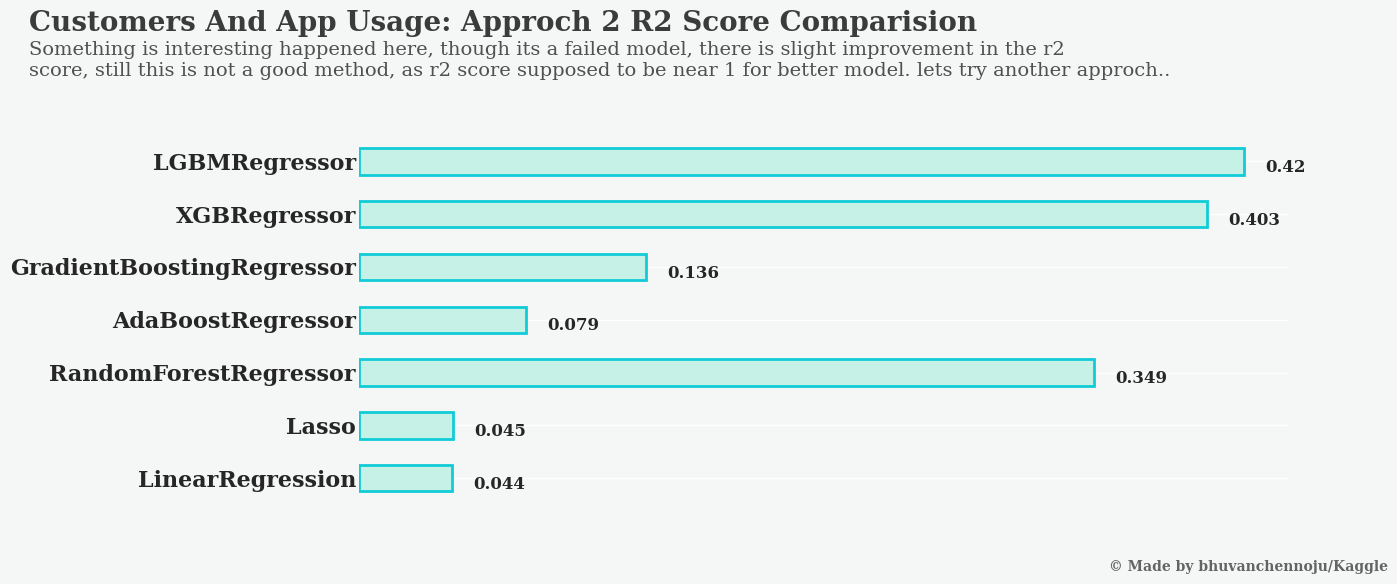

In [22]:
fig,ax = plt.subplots(figsize = (12,5), dpi = 100)
fig.patch.set_facecolor('#f5f6f6')
ax.axes.set_facecolor('#f5f6f6')

ax.tick_params(axis='both', 
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 0.001)

ax.barh(y = baseline['Algorithm'], width = baseline['r2_score'] , height = 0.5, color = colors[1], edgecolor = colors[0], linewidth =2)
ax.set_yticklabels(baseline['Algorithm'], {'font':'serif','size':16,'weight':'bold'}, )

#ax.errorbar(x = , b, xerr=c, fmt="o", color="r")

for pa in ax.patches: 
        ax.text((pa.get_width())+0.01, pa.get_y()+0.05,'{}'.format(round(pa.get_width(),3)), **{'font':'serif', 'size':12, 'weight':'bold'}, alpha = 1)
        
ax.axes.get_xaxis().set_visible(False)

for loc in ['left', 'right', 'top','bottom']:
    ax.spines[loc].set_visible(False)
    

fig.text(-0.15,1.08,'Customers And App Usage: Approch 2 R2 Score Comparision' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(-0.15,0.99,'''Something is interesting happened here, though its a failed model, there is slight improvement in the r2
score, still this is not a good method, as r2 score supposed to be near 1 for better model. lets try another approch..''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,0,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)
fig.show()

<a id = '3.3'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 3. Approch 3: Going In Right Direction</h2>

Clearly, with the both above approches I understood that I need a better model with a relatively good baseline score. As I see in approch 2 something happened but due to lack of baseline score, I am not in a position to know the direction of shift with new approch.  

With this kind of timeseries data, having a lag of past date values surely helps. But Before that I need a basline score to compare with.


From my kaggle experience, I have learned that one can safely assume for todays true values as predictions of tomorrow.

i.e, prediction of t(n) th day as t(n-1) day true values... <strong>Assumption made for a baseline score</strong>
<br>
<br>

<strong>For Baseline Score Only Primary features are considering </strong> based on the score I will improve upon this model..
<br>
<br>

1. <strong> last_date_hours:</strong> This is simply the number of hours that a customer had in the previous date (t(n-1))
2. <strong> last_date_hours:</strong> This is the difference between the number of online hours in the previous date and the date before it (t(n-1) - t(n-2))


In [23]:
## preparing the training data
train_df_copy = train_df.copy()

train_df_copy['date'] = pd.to_datetime(train_df_copy['date'])

train_df_copy['day']= train_df_copy['date'].dt.day
train_df_copy['date']= train_df_copy['date'].dt.date

train_df_copy['last_day_onlinehours'] = train_df_copy.groupby(['id'])['online_hours'].shift(1) # one row shift to get online_hours
train_df_copy['last_day_diff'] = train_df_copy.groupby(['id'])['last_day_onlinehours'].diff() # last day and previous day online hours
#train_df_copy.fillna(0,inplace = True)



print('\n' +'*'*5+ ' Lag added Training Data Copy Head ' +'*'*5+'\n')

print(train_df_copy.head())
print('\n' +'*'*50+ '\n')


***** Lag added Training Data Copy Head *****

       id        date  online_hours  day  last_day_onlinehours  last_day_diff
0  111556  2017-06-01           2.3    1                   NaN            NaN
1  111556  2017-06-02           2.5    2                   2.3            NaN
0  111556  2017-06-03           0.0    3                   2.5            0.2
1  111556  2017-06-04           0.0    4                   0.0           -2.5
2  111556  2017-06-05           4.7    5                   0.0            0.0

**************************************************



<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Lets write helper function for rmse metric:</strong></p>

In [24]:
## root mean squre error
def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue,ypred))

I have read in kaggle discussion, about this idea of validating on fly mode, which seems better to validate model when data is very less. 
<strong>Idea is that train model upto (n-m) datapoints and validate on last m datapoints, and there by take the mean of metric as a evaluation metric. </strong> Lets implement this idea here to find the <strong>Baseline Score.</strong>
<br>
<br>
as we have total 21 days of training data, I choose to apply this sliding window validataion from 15th day datapoints. 
<br>
I am going to assume yesterdays online hours per user as predictions for today and calculate the root mean square error, and with sliding window validation, I am going to move from 15th day plus one for each cylce to validate all the day after.

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Baseline Score:</strong></p>

In [25]:
baseline_errors = []
for day in range(15,21):
    train = train_df_copy[train_df_copy['day'] < day]
    valid = train_df_copy[train_df_copy['day'] == day]
    
    preds = valid['last_day_onlinehours'].values
    
    score = rmse(valid['online_hours'].values,preds)
    print('Trained upto Day %d and RMSE for next %d th day Predictions is %.5f' % (day, 21- day,score))
    baseline_errors.append(score)

print('\n' +'*'*20  +'Final Mean RMSE Score'+'*'*20 + '\n')
print('                  Mean RMSE Score:    %.5f' % np.mean(baseline_errors))
print('\n' +'*'*61 + '\n')

Trained upto Day 15 and RMSE for next 6 th day Predictions is 3.02304
Trained upto Day 16 and RMSE for next 5 th day Predictions is 3.00664
Trained upto Day 17 and RMSE for next 4 th day Predictions is 4.27245
Trained upto Day 18 and RMSE for next 3 th day Predictions is 3.37518
Trained upto Day 19 and RMSE for next 2 th day Predictions is 4.14358
Trained upto Day 20 and RMSE for next 1 th day Predictions is 2.87208

********************Final Mean RMSE Score********************

                  Mean RMSE Score:    3.44883

*************************************************************



<strong>Baseline Score: 3.448883</strong> which need to be crossed by our model..

Now I am going to use the online hours lag...

<strong>Lag is a past days and beyond values which we feed into model to predict current timestep, This is similar to last_day_onlinehours and last_day_diff</strong>

As I already have lag1 data, lets fit this on <strong>LGBMRegressor</strong> as this showed some good response in Approch 2 compared to Approch 1.

<strong>I will follow the same method an see whether my RMSE Value reduces or not</strong>


I am checking model response to my strategy so, just feeding data as it is without any feature engineering and scaling... if things work out well I will build upon this approch...

<a id = '3.3.1'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 3.1 Approch3 Attempt 1: Fitting lag0 with Sliding Window Predictions</h2>

In [26]:
lag0_errors = []
for day in range(15,21):
    
    train = train_df_copy[train_df_copy['day'] < day]
    valid = train_df_copy[train_df_copy['day'] == day]
    
    xtrain,xtest = train.drop(columns = ['online_hours','date']),valid.drop(columns = ['online_hours','date'])
    ytrain,ytest = train['online_hours'].values, valid['online_hours'].values
    
    model = LGBMRegressor(n_estimators = 1000)
    model.fit(xtrain,ytrain)
    preds = model.predict(xtest)
    
    score = rmse(valid['online_hours'].values,preds)
    print('Trained upto Day %d and RMSE for %d day Prediction is %.5f' % (day, day+1,score))
    lag0_errors.append(score)

print('\n' +'*'*20  +'Final Mean RMSE Score'+'*'*20 + '\n')
print('                  Mean RMSE Score:    %.5f' % np.mean(lag0_errors))
print('\n' +'*'*61 + '\n')

Trained upto Day 15 and RMSE for 16 day Prediction is 2.40063
Trained upto Day 16 and RMSE for 17 day Prediction is 2.31297
Trained upto Day 17 and RMSE for 18 day Prediction is 3.94198
Trained upto Day 18 and RMSE for 19 day Prediction is 3.35395
Trained upto Day 19 and RMSE for 20 day Prediction is 3.65953
Trained upto Day 20 and RMSE for 21 day Prediction is 2.56578

********************Final Mean RMSE Score********************

                  Mean RMSE Score:    3.03914

*************************************************************



This Strategy is work, my rmse value is reduced by 10% and that to with out any feature engineering and scaling.... 
<br>
lets add few more lags and see the effect...


<strong>Adding lag2:<strong>similar to first lag, for lag one we need to shift online_hours column to 2 rows down, and take the row difference to get lag2

<a id = '3.3.2'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" >3.2 Approch3 Attempt 2: Fitting lag1 with Sliding Window Predictions</h2>

In [27]:
train_df_copy['last-1_day_onlinehours'] = train_df_copy.groupby(by = ['id'])['online_hours'].shift(2)
train_df_copy['last-1_day_hours_diff'] = train_df_copy.groupby(by = ['id'])['last-1_day_onlinehours'].diff()
#train_df_copy = train_df_copy.fillna(0)


print('\n' +'*'*5+ ' Lag1 added Training Data Copy Head ' +'*'*5+'\n')

print(train_df_copy.head())
print('\n' +'*'*50+ '\n')


***** Lag1 added Training Data Copy Head *****

       id        date  online_hours  day  last_day_onlinehours  last_day_diff  \
0  111556  2017-06-01           2.3    1                   NaN            NaN   
1  111556  2017-06-02           2.5    2                   2.3            NaN   
0  111556  2017-06-03           0.0    3                   2.5            0.2   
1  111556  2017-06-04           0.0    4                   0.0           -2.5   
2  111556  2017-06-05           4.7    5                   0.0            0.0   

   last-1_day_onlinehours  last-1_day_hours_diff  
0                     NaN                    NaN  
1                     NaN                    NaN  
0                     2.3                    NaN  
1                     2.5                    0.2  
2                     0.0                   -2.5  

**************************************************



lets repeat the method and see how rmse is going...

In [28]:
lag1_errors = []
for day in range(15,21):
    
    train = train_df_copy[train_df_copy['day'] < day]
    valid = train_df_copy[train_df_copy['day'] == day]
    
    xtrain,xtest = train.drop(columns = ['online_hours','date']),valid.drop(columns = ['online_hours','date'])
    ytrain,ytest = train['online_hours'].values, valid['online_hours'].values
    
    model = LGBMRegressor(n_estimators = 1000)
    model.fit(xtrain,ytrain)
    preds = model.predict(xtest)
    
    score = rmse(valid['online_hours'].values,preds)
    print('Trained upto Day %d and RMSE for %d day Prediction is %.5f' % (day, day+1,score))
    lag1_errors.append(score)

print('\n' +'*'*20  +'Final Mean RMSE Score'+'*'*20 + '\n')
print('                  Mean RMSE Score:    %.5f' % np.mean(lag1_errors))
print('\n' +'*'*61 + '\n')

Trained upto Day 15 and RMSE for 16 day Prediction is 2.35493
Trained upto Day 16 and RMSE for 17 day Prediction is 2.27944
Trained upto Day 17 and RMSE for 18 day Prediction is 3.91676
Trained upto Day 18 and RMSE for 19 day Prediction is 3.43761
Trained upto Day 19 and RMSE for 20 day Prediction is 3.56784
Trained upto Day 20 and RMSE for 21 day Prediction is 2.60255

********************Final Mean RMSE Score********************

                  Mean RMSE Score:    3.02652

*************************************************************




# <strong>Decided To go with Approch 3...<strong>
<a id = '3.4'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 4. Feature Engineering - Rolling window means, Lags, and Datetime features</h2>

<p style = "font-size:20px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Helper functions for datetime features, rolling window, and lag features</strong></p>

In [29]:
def datetime_features(data):
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data.date.dt.month
    data['day_of_month'] = data.date.dt.day
    data['day_of_year'] = data.date.dt.dayofyear
    data['week_of_year'] = data.date.dt.weekofyear
    data['day_of_week'] = data.date.dt.dayofweek + 1
    data['year'] = data.date.dt.year
    data["is_wknd"] = data.date.dt.weekday // 4
    data["quarter"] = data.date.dt.quarter
    data['is_month_start'] = data.date.dt.is_month_start.astype(int)
    data['is_month_end'] = data.date.dt.is_month_end.astype(int)
    data['is_quarter_start'] = data.date.dt.is_quarter_start.astype(int)
    data['is_quarter_end'] = data.date.dt.is_quarter_end.astype(int)
    data['is_year_start'] = data.date.dt.is_year_start.astype(int)
    data['is_year_end'] = data.date.dt.is_year_end.astype(int)
    
    week_names = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4,'Friday':5,'Saturday':6}
    month_names = {'January':0, 'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,
                'August':7, 'September':8,'October':9,'November':10,'December':11}
    
    return data


def rolling_window_mean(data):
    # 7 day rolling window mean
    for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,61,17,18,19,20,21]:
        data["onlinehours_roll_mean_"+str(i)] = data.groupby(["id"])['online_hours'].rolling(i).mean().shift(1).values
    #data.fillna(0,inplace = True)
    return data

def lag_features(data,lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,61,17,18,19,20,21]):
    data.sort_values(by=['id','date'], axis=0, inplace=True)
    data = data.copy()
    for lag in lags:
        data['last_day_onlinehours'+str(lag)] = data.groupby('id')['online_hours'].transform(lambda x: x.shift(lag))
        data['last_day_hours_diff' +str(lag)] = data.groupby('id')['last_day_onlinehours'+str(lag)].transform(lambda x: x.diff())
        #dataframe.fillna(0,inplace = True)
    return data


In [30]:
def preprocessing_traindata(df):
    data = df.copy()
    data = datetime_features(data)
    data = rolling_window_mean(data)
    data = lag_features(data)
    return data

df_copy  = preprocessing_traindata(df)

train_final = df_copy[df_copy['day_of_month'] < 22]
test_final = df_copy[df_copy['day_of_month'] >= 22]

In [31]:
print('\n'+'*'*15 + 'Shapes of Final Data ' + '*'*15+'\n' )

print('Shape of the Train Data: {}'.format(train_final.shape))
print('Shape of the Test Data: {}'.format(test_final.shape))


print('\n'+'*'*50 + '\n')


***************Shapes of Final Data ***************

Shape of the Train Data: (52080, 80)
Shape of the Test Data: (17500, 80)

**************************************************



<a id = '3.5'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 5. Baseline Model From Approch 3 - After feature engineering</h2>

# <strong>Still Actual Test in on hold... .<strong>

In [32]:
errors = []
for day in range(15,21):
    
    train = train_final[train_final['day_of_month'] < day]
    valid = train_final[train_final['day_of_month'] == day]
    
    xtrain,xtest = train.drop(columns = ['online_hours','date']),valid.drop(columns = ['online_hours','date'])
    ytrain,ytest = train['online_hours'].values, valid['online_hours'].values
    
    model = LGBMRegressor(n_estimators = 1000)
    model.fit(xtrain,ytrain)
    preds = model.predict(xtest)
    
    score = rmse(valid['online_hours'].values,preds)
    print('Trained upto Day %d and RMSE for %d day Prediction is %.5f' % (day, day+1,score))
    errors.append(score)

print('\n' +'*'*20  +'Final Mean RMSE Score'+'*'*20 + '\n')
print('                  Mean RMSE Score:    %.5f' % np.mean(errors))
print('\n' +'*'*61 + '\n')

Trained upto Day 15 and RMSE for 16 day Prediction is 2.26321
Trained upto Day 16 and RMSE for 17 day Prediction is 2.09437
Trained upto Day 17 and RMSE for 18 day Prediction is 1.93824
Trained upto Day 18 and RMSE for 19 day Prediction is 1.73599
Trained upto Day 19 and RMSE for 20 day Prediction is 2.09303
Trained upto Day 20 and RMSE for 21 day Prediction is 2.04027

********************Final Mean RMSE Score********************

                  Mean RMSE Score:    2.02752

*************************************************************



# <strong>Now testing model on actual Test Data....<strong>

In [33]:

train = df_copy[df_copy['day_of_month'] < 22]
test = df_copy[df_copy['day_of_month'] >= 22]


xtrain,xtest = train.drop(columns = ['id','date','online_hours']),test.drop(columns = ['id','date','online_hours'])
ytrain,ytest = train['online_hours'].values, test['online_hours'].values
    
model = LGBMRegressor(n_estimators = 1000)
model.fit(xtrain,ytrain)
preds = model.predict(xtest)
    
score = rmse(test_df.online_hours.tolist(),preds)

print('\n' +'*'*20  +'Baseline Model RMSE Score'+'*'*20 + '\n')
print('                 RMSE Score:    %.5f' % score)
print('\n' +'*'*61 + '\n')


********************Baseline Model RMSE Score********************

                 RMSE Score:    2.05694

*************************************************************



<a id = '3.6'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 6. Feature Selection with PermutationImportance - eli5 implementation</h2>

In [34]:
train = train_final[train_final['day_of_month'] < 16]
valid = train_final[train_final['day_of_month'] >=16]
    
xtrain,xvalid = train.drop(columns = ['online_hours','date']),valid.drop(columns = ['online_hours','date'])
ytrain,yvalid = train['online_hours'].values, valid['online_hours'].values

model = XGBRegressor().fit(xtrain,ytrain)

perm = PermutationImportance(model,scoring='r2' ).fit(xvalid,yvalid)
eli5_feature_importance = (pd.DataFrame({'Features':xtrain.columns.tolist(),'Importance':perm.feature_importances_})
                           .sort_values(by = 'Importance'))

print('Feature impact weights and importance for the given model:')
eli5.show_weights(perm, feature_names = xtrain.columns.tolist())

Feature impact weights and importance for the given model:


Weight,Feature
0.4828 ± 0.0035,last_day_onlinehours7
0.0792 ± 0.0043,day_of_week
0.0428 ± 0.0017,last_day_onlinehours14
0.0386 ± 0.0039,last_day_onlinehours1
0.0242 ± 0.0026,onlinehours_roll_mean_15
0.0208 ± 0.0024,onlinehours_roll_mean_3
0.0175 ± 0.0014,onlinehours_roll_mean_6
0.0165 ± 0.0010,onlinehours_roll_mean_4
0.0133 ± 0.0010,last_day_onlinehours4
0.0129 ± 0.0029,last_day_onlinehours6


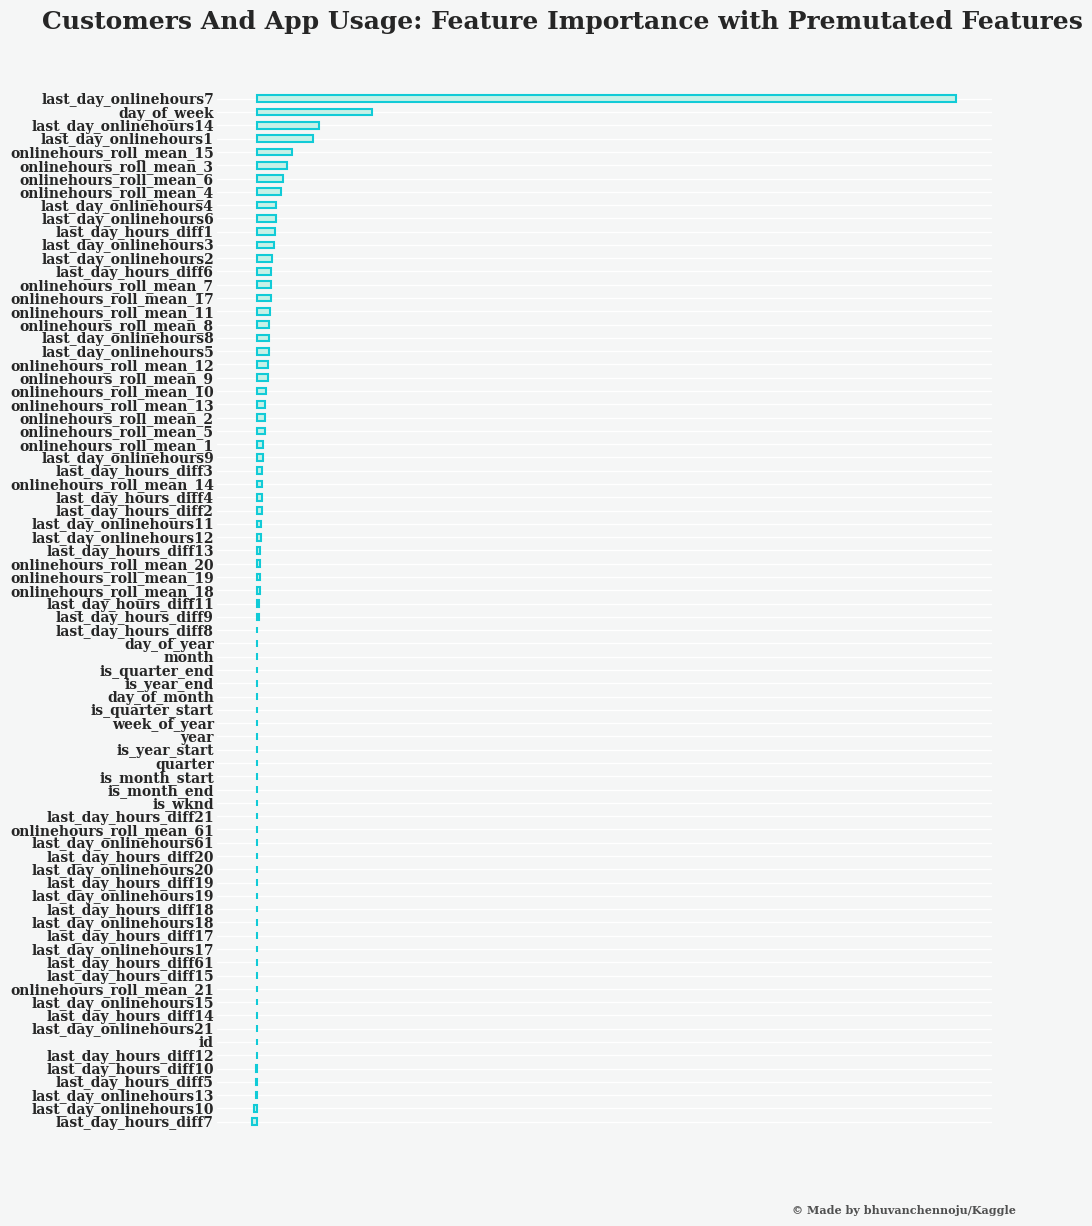

In [35]:
def plot_imp(data, ax = None):
    if ax == None:
        fig,ax = plt.subplots(figsize = (10,15), dpi = 100)
        fig.patch.set_facecolor('#f5f6f6')
        ax.set_facecolor('#f5f6f6')
        
        ax.tick_params(axis='both', 
                   labelsize = 10, which = 'major',
                   direction = 'out',pad = 2,
                   length = 0.0001)
    
    #data['shades'] = data['Features'].apply(lambda x: '#FB5B68' if x == 'Random' else colors[1])
    
    ax.barh(y = data.Features, width = data.Importance,
            height = 0.5, color = colors[1],  edgecolor = colors[0], linewidth = 1.5)
    
    for loc in ['left','right','bottom','top']:
        ax.spines[loc].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)
    
    ax.set_yticklabels(data.Features, {'font':'serif','size':10,'weight':'bold'})


plot_imp(eli5_feature_importance)
plt.gcf().text(-0.05,0.89,'Customers And App Usage: Feature Importance with Premutated Features',{'font': 'serif', 'size':18,'weight':'bold',})

plt.gcf().text(0.7,0.1,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':8, 'weight':'bold'},alpha = 0.8)
plt.show()

In [36]:
## feature selection based on permutation importance
feature_import = (eli5_feature_importance.sort_values(by = 'Importance', ascending = False)
                  .reset_index(drop = True).Features.tolist()[0:40]) 

<a id = '3.7'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 7. Final Baseline Model with Feature Selection</h2>

In [37]:

train = df_copy[df_copy['day_of_month'] < 22]
test = df_copy[df_copy['day_of_month'] >= 22]


xtrain,xtest = train.drop(columns = ['id','date','online_hours']),test.drop(columns = ['id','date','online_hours'])
xtrain = xtrain[feature_import]
xtest = xtest[feature_import]
ytrain,ytest = train['online_hours'].values, test['online_hours'].values
    
model = LGBMRegressor(n_estimators = 1000)
model.fit(xtrain,ytrain)
preds = model.predict(xtest)
    
score = rmse(test_df.online_hours.tolist(),preds)

    
print('\n' +'*'*20  +'Baseline Model RMSE Score with feature selection'+'*'*20 + '\n')
print('                 RMSE Score:    %.5f' % score)
print('\n' +'*'*81 + '\n')


********************Baseline Model RMSE Score with feature selection********************

                 RMSE Score:    2.02679

*********************************************************************************



There is a slight improvement here... with feature selection (selected top 40 out of 80 features)

<a id = '3.8'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 8. Hyperparameter tunning with optuna</h2>

In [38]:
### this takes hell lot of time so changed grid and number of trial to min
## feel free to fork and play wiht parameters

import optuna

def objective(trial):
    
    xtrain,xvalid = train.drop(columns = ['online_hours','date']),valid.drop(columns = ['online_hours','date'])
    xtrain,xvalid = xtrain[feature_import], xvalid[feature_import]
    
    ytrain,yvalid = train['online_hours'].values, valid['online_hours'].values  
    
    param = {
        'objective': 'regression',
        'metric': 'root_mean_squared_error',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 15),
        'learning_rate': trial.suggest_uniform('learning_rate', 0, 0.1 ),
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        #'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        #'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        #'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
       # 'device':"gpu",
       # 'gpu_use_dp':True
        
    }
    model = LGBMRegressor(**param)  
    
    model.fit(xtrain,ytrain,eval_set=[(xvalid,yvalid)],early_stopping_rounds=10,verbose=False)
    
    preds = model.predict(xvalid)
    
    rmse_error = rmse(yvalid, preds)
    
    return rmse_error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-07-02 19:22:47,567] A new study created in memory with name: no-name-3354aac4-e35f-4140-b9b9-015965d48c3f


[LightGBM] [Warning] lambda_l2 is set=0.00021766730494866783, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021766730494866783
[LightGBM] [Warning] lambda_l1 is set=0.41997056316132997, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41997056316132997


[I 2021-07-02 19:22:48,952] Trial 0 finished with value: 1.9820655436490258 and parameters: {'lambda_l1': 0.41997056316132997, 'lambda_l2': 0.00021766730494866783, 'num_leaves': 3, 'learning_rate': 0.022712863940065033, 'n_estimators': 325}. Best is trial 0 with value: 1.9820655436490258.


[LightGBM] [Warning] lambda_l2 is set=7.940181586730915e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.940181586730915e-06
[LightGBM] [Warning] lambda_l1 is set=0.003722807935278074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003722807935278074


[I 2021-07-02 19:22:54,814] Trial 1 finished with value: 1.7888534257688828 and parameters: {'lambda_l1': 0.003722807935278074, 'lambda_l2': 7.940181586730915e-06, 'num_leaves': 15, 'learning_rate': 0.014937540970086939, 'n_estimators': 786}. Best is trial 1 with value: 1.7888534257688828.


[LightGBM] [Warning] lambda_l2 is set=2.695229235398677e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.695229235398677e-07
[LightGBM] [Warning] lambda_l1 is set=2.1362209878108773e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1362209878108773e-06


[I 2021-07-02 19:22:58,198] Trial 2 finished with value: 1.6991845257083158 and parameters: {'lambda_l1': 2.1362209878108773e-06, 'lambda_l2': 2.695229235398677e-07, 'num_leaves': 8, 'learning_rate': 0.08528652514930317, 'n_estimators': 710}. Best is trial 2 with value: 1.6991845257083158.


[LightGBM] [Warning] lambda_l2 is set=0.002172084013756366, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002172084013756366
[LightGBM] [Warning] lambda_l1 is set=0.00014976500891557208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014976500891557208


[I 2021-07-02 19:23:00,628] Trial 3 finished with value: 1.8062545631053142 and parameters: {'lambda_l1': 0.00014976500891557208, 'lambda_l2': 0.002172084013756366, 'num_leaves': 7, 'learning_rate': 0.053381778520760904, 'n_estimators': 477}. Best is trial 2 with value: 1.6991845257083158.


[LightGBM] [Warning] lambda_l2 is set=0.00014802378411680073, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014802378411680073
[LightGBM] [Warning] lambda_l1 is set=2.95867700883321e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.95867700883321e-06


[I 2021-07-02 19:23:03,119] Trial 4 finished with value: 1.697588417596183 and parameters: {'lambda_l1': 2.95867700883321e-06, 'lambda_l2': 0.00014802378411680073, 'num_leaves': 11, 'learning_rate': 0.09672384538068302, 'n_estimators': 429}. Best is trial 4 with value: 1.697588417596183.


[LightGBM] [Warning] lambda_l2 is set=4.325039372442393e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.325039372442393e-08
[LightGBM] [Warning] lambda_l1 is set=9.317814819566669e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.317814819566669e-07


[I 2021-07-02 19:23:09,786] Trial 5 finished with value: 1.914987252446789 and parameters: {'lambda_l1': 9.317814819566669e-07, 'lambda_l2': 4.325039372442393e-08, 'num_leaves': 11, 'learning_rate': 0.0030132232699446983, 'n_estimators': 865}. Best is trial 4 with value: 1.697588417596183.


[LightGBM] [Warning] lambda_l2 is set=0.00154134490414865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00154134490414865
[LightGBM] [Warning] lambda_l1 is set=2.212684473758476e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.212684473758476e-06


[I 2021-07-02 19:23:13,936] Trial 6 finished with value: 1.6190774371743364 and parameters: {'lambda_l1': 2.212684473758476e-06, 'lambda_l2': 0.00154134490414865, 'num_leaves': 11, 'learning_rate': 0.0987241841527954, 'n_estimators': 680}. Best is trial 6 with value: 1.6190774371743364.


[LightGBM] [Warning] lambda_l2 is set=0.18378440301266116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18378440301266116
[LightGBM] [Warning] lambda_l1 is set=4.034673448006059e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.034673448006059e-06


[I 2021-07-02 19:23:16,506] Trial 7 finished with value: 3.0808803601990866 and parameters: {'lambda_l1': 4.034673448006059e-06, 'lambda_l2': 0.18378440301266116, 'num_leaves': 9, 'learning_rate': 0.0005388219509457337, 'n_estimators': 349}. Best is trial 6 with value: 1.6190774371743364.


[LightGBM] [Warning] lambda_l2 is set=0.0004606242934503841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004606242934503841
[LightGBM] [Warning] lambda_l1 is set=0.13195153051785502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13195153051785502


[I 2021-07-02 19:23:18,927] Trial 8 finished with value: 1.9026057205471976 and parameters: {'lambda_l1': 0.13195153051785502, 'lambda_l2': 0.0004606242934503841, 'num_leaves': 3, 'learning_rate': 0.04487670274217475, 'n_estimators': 682}. Best is trial 6 with value: 1.6190774371743364.


[LightGBM] [Warning] lambda_l2 is set=1.2585464787204737e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2585464787204737e-05
[LightGBM] [Warning] lambda_l1 is set=1.5847875742195493e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5847875742195493e-07


[I 2021-07-02 19:23:21,725] Trial 9 finished with value: 1.6523861895820582 and parameters: {'lambda_l1': 1.5847875742195493e-07, 'lambda_l2': 1.2585464787204737e-05, 'num_leaves': 14, 'learning_rate': 0.09953971386156193, 'n_estimators': 432}. Best is trial 6 with value: 1.6190774371743364.


Number of finished trials: 10
Best trial: {'lambda_l1': 2.212684473758476e-06, 'lambda_l2': 0.00154134490414865, 'num_leaves': 11, 'learning_rate': 0.0987241841527954, 'n_estimators': 680}


<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Optimization History - RMSE and Trail</strong></p>

In [39]:
optuna.visualization.plot_optimization_history(study)

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Ploting Parameters Importances for Tunned Modle</strong></p>

In [40]:
optuna.visualization.plot_param_importances(study)

<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Final Tunned Model and Parameters</strong></p>

In [41]:
best_params = study.best_trial.params
print(best_params)
opt_model = LGBMRegressor(**best_params,objective='regression', 
                          metric='root_mean_squared_error')

{'lambda_l1': 2.212684473758476e-06, 'lambda_l2': 0.00154134490414865, 'num_leaves': 11, 'learning_rate': 0.0987241841527954, 'n_estimators': 680}


In [42]:

train = df_copy[df_copy['day_of_month'] < 22]
test = df_copy[df_copy['day_of_month'] >= 22]


xtrain,xtest = train.drop(columns = ['id','date','online_hours']),test.drop(columns = ['id','date','online_hours'])
xtrain = xtrain[feature_import]
xtest = xtest[feature_import]
ytrain,ytest = train['online_hours'].values, test['online_hours'].values
    
opt_model.fit(xtrain,ytrain)
preds = opt_model.predict(xtest)
    
score = rmse(test_df.online_hours.tolist(),preds)

    

print('\n' +'*'*20  +' Optimized Model RMSE Score with feature selection'+'*'*20 + '\n')
print('                 RMSE Score:    %.5f' % score)
print('\n' +'*'*81 + '\n')

[LightGBM] [Warning] lambda_l1 is set=2.212684473758476e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.212684473758476e-06
[LightGBM] [Warning] lambda_l2 is set=0.00154134490414865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00154134490414865

******************** Optimized Model RMSE Score with feature selection********************

                 RMSE Score:    2.01768

*********************************************************************************



In [43]:
Change = (np.array(baseline_errors).mean() - score)/np.array(baseline_errors).mean() *100

print('\n' +'*'*20  +' Change in RMSE value from base score '+'*'*20 + '\n')
print('                 Percentage Change in RMSE from Baseline:    %.5f' % Change+'%')
print('\n' +'*'*81 + '\n')


******************** Change in RMSE value from base score ********************

                 Percentage Change in RMSE from Baseline:    41.49653%

*********************************************************************************



So its look good we got the percentage change in RMSE value from our baseline to optimized model is around 41% thats a big jump... Lets see the final error analysis... how model do? and which data is correctly predicted by model?

<a id = '3.9'></a>
<h2 style = "font-family: garamond; font-size: 35px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 3px 3px;padding:4px;text-align:left; font-weight: bold" > 9. Final Error Analyis</h2>

In [44]:
error = pd.DataFrame({
    "date":test.date,
    "id":test.id,
    "actual_online_hours":test_df.online_hours.tolist(),
    "pred":preds
}).reset_index(drop = True)

error["error"] = np.abs(error.actual_online_hours-error.pred)

error.sort_values("error").head(20)

,date,id,actual_online_hours,pred,error
15414,2017-06-22,897491,5,5.000025,0.000025
10650,2017-06-25,658329,0,0.000213,0.000213
14335,2017-06-28,848186,6,6.000487,0.000487
17445,2017-06-23,996799,4,4.000606,0.000606
3877,2017-06-28,315667,3,3.000907,0.000907
5212,2017-06-26,379241,3,2.998973,0.001027
6892,2017-06-26,467340,6,6.001047,0.001047
1661,2017-06-24,206852,0,0.001219,0.001219
1529,2017-06-25,197376,7,7.001284,0.001284
11598,2017-06-28,709663,7,6.998080,0.001920


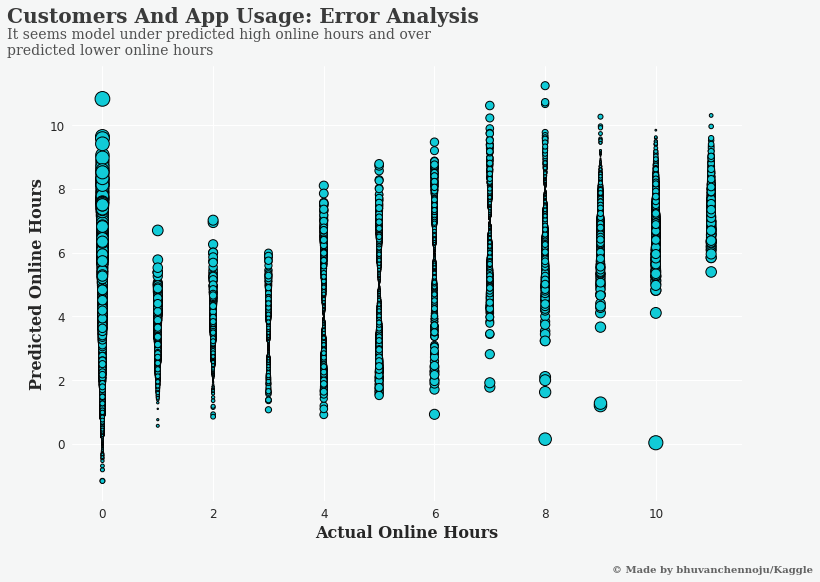

In [45]:
fig,ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')
ax.grid('off')
ax.scatter(x = error.actual_online_hours,
           y = error.pred, s = error.error*20, c = colors[0], edgecolors = 'black', linewidth = 1 )

ax.tick_params(axis='both', which='major', 
                    labelsize=12, rotation = 0)
   
ax.set_ylabel('Predicted Online Hours',**{'font':'serif','size':16,'weight':'bold'})
ax.set_xlabel('Actual Online Hours',**{'font':'serif','size':16,'weight':'bold'})



fig.text(0.05,0.955,'Customers And App Usage: Error Analysis' ,**{'font':'serif', 'size':20,'weight':'bold',}, alpha = 0.9)

fig.text(0.05,0.9,'''It seems model under predicted high online hours and over 
predicted lower online hours''',**{'font':'serif', 'size':14,}, alpha = 0.8)

fig.text(0.75,0,'© Made by bhuvanchennoju/Kaggle',{'font':'serif', 'size':10, 'weight':'bold',},alpha = 0.7)
fig.show()

<a id = '4.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" > 4. Summary</h2>
<br></h2>

Everything turn out to be excellent, the baseline value to final optimized model is 41%, while model underly predicting zero online hours. Still this approch does a great job. We haven't used any LSTMs or Statistical models for predicting timeseries prediction. Actually this predictions can be done with complex stack of LSTMs as well but highly computationally expensive. 


<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>What happend so far?</strong></p>

<ol>
    <li>Made few initial assumptions on how to handle mutliple timeseries data, and strategies about modeling with DL</li>
    <li>Performed the Data analysis and balanced the data, with manual work and Autoviz library</li>
    <li>Explored options and implemented Sliding window validtion by mimicing the timeseries analaysis with lag information about past days</li>
    <li>Explored why conventional model performed very poorly </li>
    <li>Optimized model with optuna and Did Error Analysis</li>
</ol>


<p style = "font-size:30px; color:#FA4659 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong>Well, This a lengthy notebook and Best of my work as far I know, I hope this is helpful..... Thank you so much for reading all the way here...!!</strong></p>


<a id = '5.0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; background-color: #FA4659 ; color : #F0FFF3; border-radius: 5px 5px;padding:5px;text-align:center; font-weight: bold" > 5. References</h2>
<br>

<ol>
<li><a href ="https://www.kaggle.com/ekrembayar/store-item-demand-forecasting-with-lgbm" >Store item demand forecasting with lgbm</a></li>
<li> <a href ="https://www.kaggle.com/hamzaghanmi/lgbm-hyperparameter-tuning-using-optuna/" >Hyperparameter optimization with optuna</a></li>
<li> <a href = "https://www.kaggle.com/nicapotato/keras-timeseries-multi-step-multi-output">Keras timeseries multistep multi output</a></li>
<li> <a href = "https://www.kaggle.com/jagangupta/time-series-basics-exploring-traditional-ts">timeseris basic exploring with traditional ts</a></li>
<li><a href ="https://www.mariofilho.com/how-to-predict-multiple-time-series-with-scikit-learn-with-sales-forecasting-example/" >Predict multiple time series with sklearn</a></li>
<li> <a href ="https://www.kaggle.com/ktakuma/easy-eda-with-single-line-by-autoviz/" >Autoviz visualization with single line</a></li>
<li> <a href = "https://www.kaggle.com/bhuvanchennoju/s-s-experimets-fun-with-r2-99-21">Diamonds and Dollors: experiments fun</a></li>
   

    